# <font color='#3d59c6'> MD004 SESIÓN ANÁLISIS COHORTES Y SUPERVIVENCIA </font>

<font color='#3d59c6'>**OBJETIVO SESIÓN PRÁCTICA:**</font> A partir de un dataset simulado de eventos para una app de un juego de móvil, entender la perspectiva de lo que es un análisis de cohortes. Hoy, vamos a detectar patrones o cambios de comportamientos a lo largo del ciclo de vida del usuario, trabajando nuestro dataset bajo una segmentación determinada (por ejemplo, todos los usuarios que se han registrado en un día determinado). Esto nos será útil para descubrir tendencias y tomar medidas. En nuestro ejemplo, nos será especialmente útil para analizar la retención de usuario.

![alt text](http://3.bp.blogspot.com/-TJzEuH70b1E/VUXCxd1yy9I/AAAAAAAAAI4/HQutgYTzsn4/s1600/retention%2BPS%2B%2B3.jpg?auto=webp&quality=85,70"Title")

<font color='#3d59c6'>**DATA**</font>: En este ejemplo utilizaremos el **dataset gamelaunch** incluido en la librería **survminer** >> describe una simulación de datos de eventos para una app de un juego de móvil, recopilando datos durante el primer mes de lanzamiento. 
Un usuario tendrá tantos registros como veces haya generado un evento. Por ejemplo, un usuario que se registre por primera vez y que se meta en la app 4 días habrá generado 5 eventos y por lo tanto se generarán 5 instancias en nuestro dataset (1 de userCreation y 4 de gameStarted, uno por cada día)

Variables:

- userid: Identificador de usuario único
- eventDate: Fecha en la que recolectamos el evento
- eventName: Tipo de evento recolectado (gameStarted o userCreation)

<font color='#3d59c6'>**PASOS:**</font> 

0. Carga de Packages
1. Carga de datos
2. Análisis de Cohortes
3. Análisis de Supervivencia
4. Conclusión

<font color='#3d59c6'>**Conceptos Teóricos:**</font>

- **Fiabilidad:** Es la probabilidad de que un sistema o usuario sobreviva más allá de un tiempo dado.
- **Función de Supervivencia:** Representa la probabilidad acumulada de que el tiempo hasta un evento (como abandono o churn) exceda un valor t, es decir: 
$$S(t) = P(T > t)$$.
- **Riesgo acumulado:** Mide la probabilidad acumulada de ocurrencia de un evento hasta un tiempo dado, relacionándose con la función de supervivencia mediante: 
$$S(t) = e^{-H(t)}$$.

## <font color='#3d59c6'>  0. CARGA DE PACKAGES </font>

- **tidyverse:** esta librería nos será útil en todo el proceso del análisis descriptivo así como también, a la hora de manipular los datos. Engloba varias librerías como por ejemplo ggplot2 y dplyr (usados en la sesión anterior)
- **ggplot2**: la usamos para crear gráficos más personalizables o dicho de otra manera, podremos crear visualizaciones complejas
- **cohorts:** nos permitirá realizar análisis y visualizaciones del dataset por cohortes
- **survival**: la usaremos para el análisis de supervivencia a través de funciones para ajustar modelos de supervivencia, calcular estadísticas de supervivencia y realizar análisis de regresión para datos de tiempo transcurrido hasta 'x' evento
- **survminer**: es complementaria a **survival** y nos proporcionará herramientas adicionales para visualizar y analizar datos de supervivencia (crear gráficos de Kaplan-Meier, curvas de riesgo acumulado, ...)
- **viridis**: nos proporciona paletas de colores diseñadas específicamente para ser perceptualmente uniformes y amigables para los daltónicos
- **lubridate**:p con esta librería podremos trabajar más facilmente con fechas y horas ya que nos facilitará la manipulación, cálculo y formateo de fechas y horas en R
- **survival**: Usada para análisis de supervivencia, permite ajustar modelos como Kaplan-Meier y regresión de Cox, calcular estadísticas de supervivencia y analizar datos de tiempo hasta un evento.
- **survminer**: Complementa a survival con herramientas para crear gráficos como curvas de Kaplan-Meier y riesgos acumulados, facilitando la visualización y personalización de resultados.

In [1]:
if (!require("tidyverse")) install.packages("tidyverse")
if (!require("ggplot2")) install.packages("ggplot2")
if (!require("cohorts")) install.packages("cohorts")
if (!require("dplyr")) install.packages("dplyr")
if (!require("survival")) install.packages("survival")
if (!require("survminer")) install.packages("survminer")
if (!require("viridis")) install.packages("viridis")
if (!require("lubridate")) install.packages("lubridate")
if (!require("survival")) install.packages("survival")
if (!require("survminer")) install.packages("survminer")

Loading required package: tidyverse

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: cohorts

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘cohorts’”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: survival

Loading required package: survminer

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“ther

In [2]:
library(tidyverse)
library(ggplot2)
library(cohorts)
library(dplyr)
library(survival)
library(survminer)
library(viridis)
library(lubridate)
library(survival)
library(survminer)

## <font color='#3d59c6'>  1. CARGA DE DATOS </font>

In [3]:
head(gamelaunch) #de forma predefinida retorna las primeras 6 observations
tail(gamelaunch) #de forma predefinida retorna las últimas 6 observations

userid,eventDate,eventName
<chr>,<dttm>,<chr>
7479a3b347cb2e174ef83afb4211277279f82ce8c6236457f087ad8992d07ffc,2016-05-24,gameStarted
1852e89f7d86b4a0fc29f72bb8c5794d558d61fba1c5acb7cc271bf3ce76e832,2016-05-24,gameStarted
bda71b9de88cd162831d89582480554b7db31bc6b3219c8c92e1ad97aa620942,2016-05-24,gameStarted
29b194585a20e1763b3a92b10eb5af3d593c6767213bd31cebac2a1f4391bc58,2016-05-24,gameStarted
bcb495e6ec9f290f4a44b826098e1e319710dffa9565ae0e5f1066bee2ebdf05,2016-05-24,gameStarted
361e53b758ed3526442f689b8c8104ac8446426d976536f66d8a36ff97df8d88,2016-05-24,gameStarted


userid,eventDate,eventName
<chr>,<dttm>,<chr>
ff6120789ed26215008e388a4078ca9a006d14001a64eb4ac9ba00242fd8e98c,2016-05-09,gameStarted
ef1163f2b354c1ca7662764a218a634c9ddcd81c1fe47e3f759db696d8f61367,2016-05-09,gameStarted
81035ecc7d87ec399f50cb41603809742c5e20c76be6727f74b1d95d3f09315c,2016-05-09,gameStarted
11b159d617f7e62975162274a91ad83711e62cc14150f90a140752cccc0858b0,2016-05-09,gameStarted
7720cecf3dbb173ef40afbadd6c371a434c46fb57dbcc608bb5fa67c49a941a0,2016-05-09,gameStarted
a7088235b2bca4c67a8f86583ae1ecb56eb04379c9d93ec3a4fd35f742aea6d9,2016-05-09,gameStarted


In [4]:
dim(gamelaunch)

[1] 29324     3

In [5]:
summary(gamelaunch)

    userid            eventDate                       eventName        
 Length:29324       Min.   :2016-04-27 00:00:00.00   Length:29324      
 Class :character   1st Qu.:2016-05-04 00:00:00.00   Class :character  
 Mode  :character   Median :2016-05-10 00:00:00.00   Mode  :character  
                    Mean   :2016-05-11 06:30:26.75                     
                    3rd Qu.:2016-05-18 00:00:00.00                     
                    Max.   :2016-05-27 00:00:00.00                     

In [6]:
null_counts = colSums(is.na(gamelaunch))
print(null_counts)

   userid eventDate eventName 
        0         0         0 


In [7]:
# Asignamos la columna "eventName" del dataframe "gamelaunch" a una nueva variable llamada "columnName".
# Esto permite trabajar directamente con esa columna sin modificar el dataframe original.
columnName <- gamelaunch$eventName        

# Convertimos "columnName" en un factor. 
# Los factores se utilizan en R para representar variables categóricas y son útiles para realizar análisis o gráficos.
columnName <- factor(columnName)

# Creamos una tabla de frecuencias de los niveles del factor "columnName".
# Esto cuenta cuántas veces aparece cada categoría en la columna.
counts <- table(columnName)

# Mostramos la tabla de frecuencias en la consola.
# Esto es útil para inspeccionar los datos o verificar los resultados de la tabulación.
print(counts)

columnName
gameStarted   newPlayer 
      25222        4102 


In [8]:
# Usamos el operador pipe `%>%` para encadenar operaciones de forma legible y eficiente.
# El operador es proporcionado por el paquete `dplyr` y facilita la escritura y lectura del código.

# Comenzamos con el dataframe "gamelaunch" y realizamos una operación de resumen con la función summarise().
num_userid <- gamelaunch %>%
  # Dentro de summarise(), calculamos el número de valores únicos en la columna "userid" 
  # utilizando la función n_distinct().
  summarise(num_userid = n_distinct(userid))

# Imprimimos el resultado en la consola.
# Como "num_userid" es ahora un dataframe con una sola fila y una columna, 
# al imprimirlo veremos algo como: num_userid = X (donde X es el número de usuarios únicos).
num_userid

num_userid
<int>
3994


In [9]:
# Usamos el dataframe "gamelaunch" y aplicamos una operación de resumen utilizando `summarise`.
num_combinaciones <- gamelaunch %>%
  # En `summarise()`, calculamos el número de combinaciones únicas de las columnas 
  # "eventDate", "userid" y "eventName". Para esto usamos `n_distinct()`.
  summarise(num_combinaciones = n_distinct(eventDate, userid, eventName))

# Imprimimos el resultado en la consola. El dataframe resultante tendrá una sola fila y una columna,
# mostrando el número total de combinaciones únicas.
num_combinaciones

num_combinaciones
<int>
29324


In [10]:
num_combinaciones = gamelaunch %>%
  summarise(num_combinaciones = n_distinct(eventDate, userid))
num_combinaciones

num_combinaciones
<int>
25222


## <font color='#3d59c6'>  2. ANÁLISIS DE COHORTES </font>

La librería cohortes permite hacer una pivotación por cohortes para días y para meses. La función cohort_table_day nos manipulará la información creando un dataframe con las siguientes características:

- **Columnas:** Una columna por cada día que haya en nuestro dataset, representando las fechas
- **Filas:** Una fila por cada día que haya en nuestro dataset, representando la acquisición de un usuario mediante primera fecha en la que el usuario fue visto en nuestro dataset
- **Celdas:** El número de usuarios que fueron adquiridos en el cohorte (Fila) que tuvieron actividad en la fecha (columna)

In [11]:
# Usamos el dataframe "gamelaunch" y aplicamos una serie de transformaciones encadenadas con `%>%`.
gamelaunch %>%
  # La función `distinct()` elimina filas duplicadas basándose en las columnas "eventDate" y "userid".
  # El argumento `.keep_all = TRUE` asegura que se conserven todas las demás columnas del dataframe original.
  distinct(eventDate, userid, .keep_all = TRUE) %>%
  
  # Luego, aplicamos la función `cohort_table_day()`.
  # Esta función (que probablemente pertenece a un paquete específico o es personalizada) toma como argumentos:
    
  cohort_table_day(id_var = userid, # - `id_var = userid`: Indica que "userid" es el identificador único de los usuarios.
                   date = eventDate)# - `date = eventDate`: Indica que "eventDate" es la fecha asociada al usuario.

cohort,2016-04-27,2016-04-28,2016-04-29,2016-04-30,2016-05-01,2016-05-02,2016-05-03,2016-05-04,2016-05-05,⋯,2016-05-18,2016-05-19,2016-05-20,2016-05-21,2016-05-22,2016-05-23,2016-05-24,2016-05-25,2016-05-26,2016-05-27
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,96,65,55,46,46,45,44,33,34,⋯,23,16,20,13,23,21,17,16,15,16
2,NA,200,117,96,84,82,76,62,72,⋯,33,36,38,32,27,29,32,30,29,25
3,NA,NA,370,207,181,152,138,127,114,⋯,49,53,55,47,47,43,45,46,44,53
4,NA,NA,NA,387,223,177,151,129,122,⋯,69,61,57,62,57,50,48,49,46,47
5,NA,NA,NA,NA,405,222,178,152,130,⋯,59,46,60,62,53,48,42,46,41,40
6,NA,NA,NA,NA,NA,325,183,146,125,⋯,47,43,54,44,53,40,41,39,38,34
7,NA,NA,NA,NA,NA,NA,270,165,129,⋯,55,52,58,50,55,55,42,45,54,46
8,NA,NA,NA,NA,NA,NA,NA,264,142,⋯,39,43,45,35,36,35,31,30,28,34
9,NA,NA,NA,NA,NA,NA,NA,NA,267,⋯,58,57,45,54,46,44,43,38,41,33


1. **Filas (Cohort)**:
- Cada fila representa una cohorte de usuarios, agrupados por la fecha en la que realizaron su primera interacción o evento en el sistema.
- Por ejemplo:
    - Cohorte 1: incluye usuarios que ingresaron el 27 de abril de 2016.
    - Cohorte 2: incluye usuarios que ingresaron el 28 de abril de 2016, y así sucesivamente.

2. **Columnas (Fechas)**:
- Cada columna representa un día específico.
- El valor en cada celda muestra el número de usuarios de esa cohorte que permanecieron activos en esa fecha.
- Por ejemplo:
    - Para la Cohorte 1: el valor en la columna 2016-04-28 (65) indica que 65 usuarios de esa cohorte estuvieron activos el 28 de abril de 2016.

Del mismo modo podemos expresarlo como porcentajes:

In [12]:
# Usamos el dataframe "gamelaunch" y aplicamos una serie de transformaciones encadenadas con `%>%`.
gamelaunch %>%
  # La función `distinct()` elimina filas duplicadas basándose en las columnas "eventDate" y "userid".
  # El argumento `.keep_all = TRUE` asegura que se conserven todas las demás columnas del dataframe original.
  distinct(eventDate, userid, .keep_all = TRUE) %>%
  
  # Aplicamos `cohort_table_day()` para crear una tabla de cohortes basada en usuarios y fechas.
  
  cohort_table_day(id_var = userid, # - `id_var = userid`: Identificador único para cada usuario.
                   date = eventDate) %>% # - `date = eventDate`: Fecha asociada a cada usuario.
  
  # Transformamos la tabla de cohortes generada previamente en una tabla con valores porcentuales.
  # Esto puede normalizar las métricas para representar proporciones o porcentajes.
  cohort_table_pct()

cohort,2016-04-27,2016-04-28,2016-04-29,2016-04-30,2016-05-01,2016-05-02,2016-05-03,2016-05-04,2016-05-05,⋯,2016-05-18,2016-05-19,2016-05-20,2016-05-21,2016-05-22,2016-05-23,2016-05-24,2016-05-25,2016-05-26,2016-05-27
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,100,67.7,57.3,47.9,47.9,46.9,45.8,34.4,35.4,⋯,24.0,16.7,20.8,13.5,24.0,21.9,17.7,16.7,15.6,16.7
2,NA,100.0,58.5,48.0,42.0,41.0,38.0,31.0,36.0,⋯,16.5,18.0,19.0,16.0,13.5,14.5,16.0,15.0,14.5,12.5
3,NA,NA,100.0,55.9,48.9,41.1,37.3,34.3,30.8,⋯,13.2,14.3,14.9,12.7,12.7,11.6,12.2,12.4,11.9,14.3
4,NA,NA,NA,100.0,57.6,45.7,39.0,33.3,31.5,⋯,17.8,15.8,14.7,16.0,14.7,12.9,12.4,12.7,11.9,12.1
5,NA,NA,NA,NA,100.0,54.8,44.0,37.5,32.1,⋯,14.6,11.4,14.8,15.3,13.1,11.9,10.4,11.4,10.1,9.9
6,NA,NA,NA,NA,NA,100.0,56.3,44.9,38.5,⋯,14.5,13.2,16.6,13.5,16.3,12.3,12.6,12.0,11.7,10.5
7,NA,NA,NA,NA,NA,NA,100.0,61.1,47.8,⋯,20.4,19.3,21.5,18.5,20.4,20.4,15.6,16.7,20.0,17.0
8,NA,NA,NA,NA,NA,NA,NA,100.0,53.8,⋯,14.8,16.3,17.0,13.3,13.6,13.3,11.7,11.4,10.6,12.9
9,NA,NA,NA,NA,NA,NA,NA,NA,100.0,⋯,21.7,21.3,16.9,20.2,17.2,16.5,16.1,14.2,15.4,12.4


La función shift left nos permite reordenar la tabla de una forma más relevante

In [13]:
# Usamos el dataframe "gamelaunch" y aplicamos una serie de transformaciones encadenadas con `%>%`.
gamelaunch %>%
  # Filtramos filas únicas basándonos en las columnas "eventDate" y "userid".
  # Esto asegura que cada combinación de fecha y usuario se considere solo una vez.
  # El argumento `.keep_all = TRUE` mantiene todas las demás columnas en el resultado.
  distinct(eventDate, userid, .keep_all = TRUE) %>%
  
  # Creamos una tabla de cohortes basada en las fechas de evento y el identificador único del usuario.
  
  cohort_table_day(id_var = userid, # - `id_var = userid`: Indica el identificador único de los usuarios.
                   date = eventDate) %>% # - `date = eventDate`: Define las cohortes según las fechas.
  
  # Transformamos la tabla de cohortes en una tabla con valores porcentuales.
  # Esto permite comparar fácilmente las cohortes entre sí, independientemente de sus tamaños absolutos.
  cohort_table_pct() %>%
  
  # Ajustamos la tabla desplazando las columnas hacia la izquierda.
  # Esta operación puede ser útil para reorganizar los datos o alinear las cohortes de manera que el análisis sea más claro.
  # `shift_left()` es útil en tablas de cohortes donde las columnas representan días, semanas u otras unidades temporales.
  shift_left()


cohort,t0,t1,t2,t3,t4,t5,t6,t7,t8,⋯,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,100,67.7,57.3,47.9,47.9,46.9,45.8,34.4,35.4,⋯,24.0,16.7,20.8,13.5,24.0,21.9,17.7,16.7,15.6,16.7
2,100,58.5,48.0,42.0,41.0,38.0,31.0,36.0,31.5,⋯,18.0,19.0,16.0,13.5,14.5,16.0,15.0,14.5,12.5,0.0
3,100,55.9,48.9,41.1,37.3,34.3,30.8,26.5,25.7,⋯,14.9,12.7,12.7,11.6,12.2,12.4,11.9,14.3,0.0,0.0
4,100,57.6,45.7,39.0,33.3,31.5,27.6,29.7,29.5,⋯,16.0,14.7,12.9,12.4,12.7,11.9,12.1,0.0,0.0,0.0
5,100,54.8,44.0,37.5,32.1,32.3,31.6,25.4,21.2,⋯,13.1,11.9,10.4,11.4,10.1,9.9,0.0,0.0,0.0,0.0
6,100,56.3,44.9,38.5,36.6,32.3,26.2,22.5,22.2,⋯,12.3,12.6,12.0,11.7,10.5,0.0,0.0,0.0,0.0,0.0
7,100,61.1,47.8,41.9,41.9,37.8,31.5,33.0,27.8,⋯,15.6,16.7,20.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0
8,100,53.8,47.0,34.5,27.7,28.8,30.7,23.9,22.7,⋯,11.4,10.6,12.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,100,57.3,42.7,41.2,37.1,35.2,33.3,27.0,25.5,⋯,15.4,12.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


La tabla resultante del código refleja una **tabla de cohortes en valores porcentuales**, donde:

1. **Filas (Cohort)**:
- Cada fila representa una cohorte de usuarios que ingresaron por primera vez al sistema en una fecha específica (eventDate).
- Por ejemplo, Cohorte 1 corresponde a los usuarios que se unieron el 27 de abril de 2016, Cohorte 2 al 28 de abril de 2016, y así sucesivamente.


2. **Columnas (Días)**:
- Cada columna representa un día desde que los usuarios de esa cohorte ingresaron por primera vez.
- Los valores son porcentajes, indicando el porcentaje de usuarios de esa cohorte que estuvieron activos en un día determinado, relativo al total de usuarios que ingresaron ese día.
- Por ejemplo:
    - Si el valor en la celda de la Cohorte 1, Día 1 es 100%, significa que todos los usuarios de esa cohorte estuvieron activos en el primer día.
    - Si en el Día 3 el valor es 60%, significa que solo el 60% de los usuarios iniciales permanecieron activos en ese día.


3. **Porcentajes decrecientes**:
- Los valores tienden a disminuir en las columnas hacia la derecha, lo cual refleja el comportamiento típico de churn:
    - Con el tiempo, un porcentaje decreciente de usuarios permanece activo.

Finalmente, podemos utilizar shift_left_pct para hacer un código más limpio

In [14]:
# Usamos el dataframe "gamelaunch" para realizar una serie de transformaciones encadenadas con `%>%`.
cohortTable <- gamelaunch %>%
  # Eliminamos filas duplicadas basándonos en las columnas "eventDate" y "userid".
  # Esto asegura que cada combinación de fecha y usuario sea única.
  # `.keep_all = TRUE` conserva todas las demás columnas del dataframe original.
  distinct(eventDate, userid, .keep_all = TRUE) %>%
  
  # Generamos una tabla de cohortes agrupada por el identificador del usuario (`userid`) y la fecha del evento (`eventDate`).
  # Cada cohorte representa un conjunto de usuarios que tuvieron su primer evento en una fecha específica.
  cohort_table_day(id_var = userid, date = eventDate) %>%
  
  # Ajustamos la tabla desplazando las columnas hacia la izquierda y normalizamos los valores a porcentajes.
  # Esto alinea las cohortes para facilitar su comparación y convierte las métricas en proporciones.
  shift_left_pct() %>%
  
  # Aplicamos `mutate_all()` para modificar todas las columnas del dataframe.
  # Usamos una función lambda (~) para reemplazar los valores iguales a 0 con cadenas vacías ("").
  # Esto puede ser útil para limpiar la tabla y hacerla más legible, eliminando ceros innecesarios.
  mutate_all(~ ifelse(. == 0, "", .))

# Mostramos el resultado final.
cohortTable

cohort,t0,t1,t2,t3,t4,t5,t6,t7,t8,⋯,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30
<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,100,67.7,57.3,47.9,47.9,46.9,45.8,34.4,35.4,⋯,24,16.7,20.8,13.5,24,21.9,17.7,16.7,15.6,16.7
2,100,58.5,48,42,41,38,31,36,31.5,⋯,18,19,16,13.5,14.5,16,15,14.5,12.5,
3,100,55.9,48.9,41.1,37.3,34.3,30.8,26.5,25.7,⋯,14.9,12.7,12.7,11.6,12.2,12.4,11.9,14.3,,
4,100,57.6,45.7,39,33.3,31.5,27.6,29.7,29.5,⋯,16,14.7,12.9,12.4,12.7,11.9,12.1,,,
5,100,54.8,44,37.5,32.1,32.3,31.6,25.4,21.2,⋯,13.1,11.9,10.4,11.4,10.1,9.9,,,,
6,100,56.3,44.9,38.5,36.6,32.3,26.2,22.5,22.2,⋯,12.3,12.6,12,11.7,10.5,,,,,
7,100,61.1,47.8,41.9,41.9,37.8,31.5,33,27.8,⋯,15.6,16.7,20,17,,,,,,
8,100,53.8,47,34.5,27.7,28.8,30.7,23.9,22.7,⋯,11.4,10.6,12.9,,,,,,,
9,100,57.3,42.7,41.2,37.1,35.2,33.3,27,25.5,⋯,15.4,12.4,,,,,,,,


Estos porcentajes nos ayudan a definir el concepto de "Retención de usuario" o lo que es lo mismo, entender cuántos usuarios vuelven a nuestra app pasados N días.

A continuación manipularemos los datos para representar y comparar gráficamente la tabla de cohortes generada

In [15]:
# Usamos el dataframe "gamelaunch" para realizar una serie de transformaciones.
gamelaunch_long <- gamelaunch %>%
  # Eliminamos filas duplicadas basándonos en "eventDate" y "userid",
  # asegurando que cada combinación de fecha y usuario sea única.
  distinct(eventDate, userid, .keep_all = TRUE) %>%
  
  # Creamos una tabla de cohortes con filas agrupadas por usuario y fecha del evento inicial.
  cohort_table_day(userid, eventDate) %>%
  
  # Desplazamos las columnas hacia la izquierda y convertimos los valores en porcentajes.
  shift_left_pct() %>%
  
  # Transformamos la tabla de cohortes a un formato "largo" (long format), 
  # donde las columnas (como t1, t2, etc.) se pivotan para crear una estructura con 4 columnas:
  # - `cohort`: Representa las cohortes.
  # - `name`: Contiene los nombres de las columnas pivotadas (e.g., "t1", "t2").
  # - `value`: Los valores correspondientes a cada combinación de `cohort` y `name`.
  pivot_longer(-cohort) %>%
  
  # Usamos `mutate()` para crear una nueva columna `time`, basada en la columna `name`.
  # Quitamos la letra "t" de los nombres (e.g., "t1" -> "1") y convertimos el resultado en un número.
  mutate(time = as.numeric(str_remove(name, "t")))

# Mostramos las primeras filas del dataframe resultante.
head(gamelaunch_long)

cohort,name,value,time
<int>,<chr>,<dbl>,<dbl>
1,t0,100.0,0
1,t1,67.7,1
1,t2,57.3,2
1,t3,47.9,3
1,t4,47.9,4
1,t5,46.9,5


In [16]:
# Aplicamos un filtro adicional al dataframe `gamelaunch_long`.
gamelaunch_long <- gamelaunch_long %>%
  # Usamos `filter()` para eliminar:
  # - Las filas donde `name` sea igual a 't0' (ya que siempre tiene un valor del 100% y no aporta variabilidad).
  # - Las filas donde `value` sea menor o igual a 0 (asumiendo que estas filas no son relevantes para el análisis).
  filter(name != 't0' & value > 0)

# Mostramos las primeras filas del dataframe resultante.
head(gamelaunch_long)

cohort,name,value,time
<int>,<chr>,<dbl>,<dbl>
1,t1,67.7,1
1,t2,57.3,2
1,t3,47.9,3
1,t4,47.9,4
1,t5,46.9,5
1,t6,45.8,6


Con el dataframe actualizado podemos hacer una representación gráfica:

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


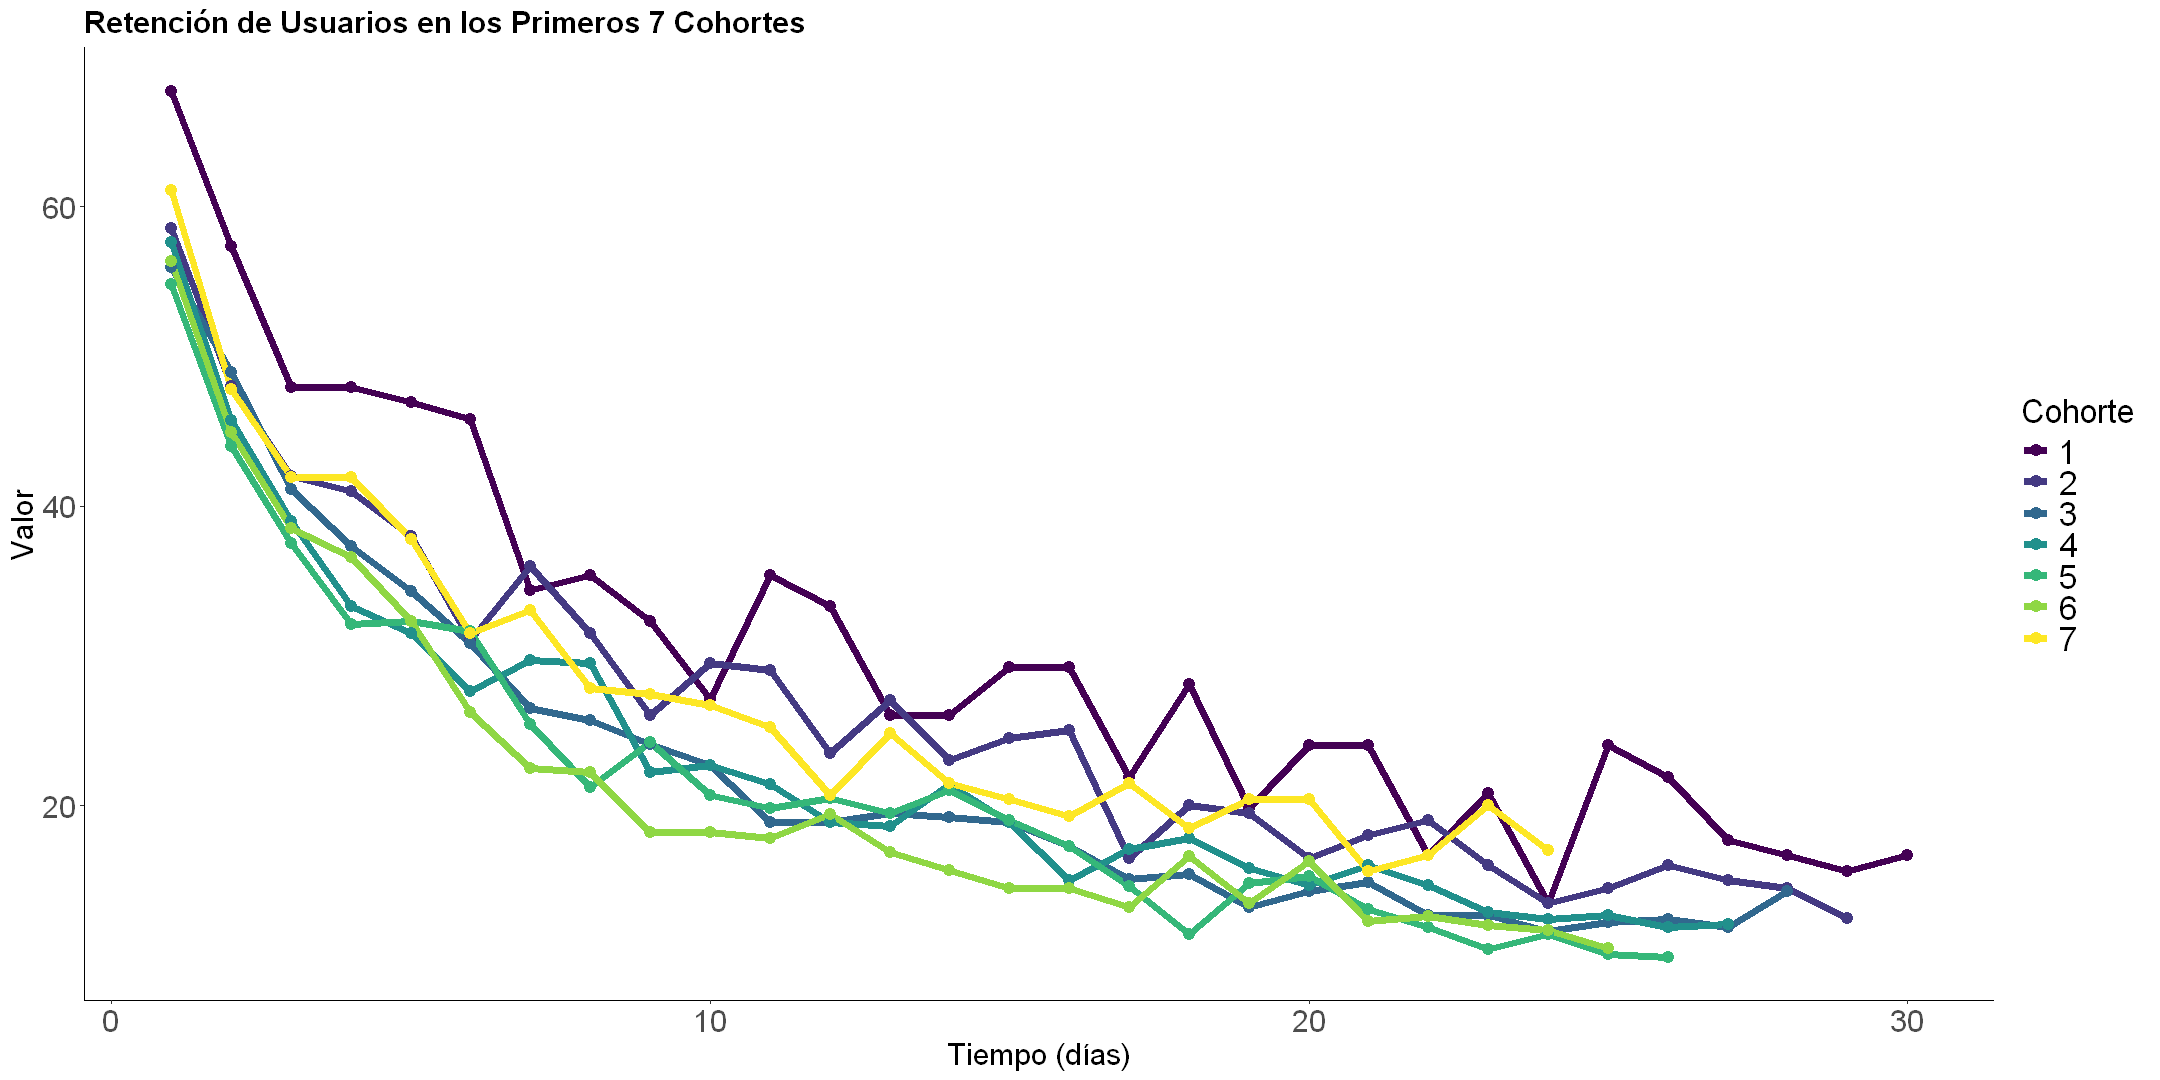

In [17]:
options(
  repr.plot.width = 18,  # Ancho del gráfico en pulgadas.
  repr.plot.height = 9   # Altura del gráfico en pulgadas.
)

gamelaunch_long %>%
  # Filtramos para incluir solo las primeras 7 cohortes.
  filter(cohort <= 7) %>%
  
  # Iniciamos el gráfico con ggplot y definimos los mapeos estéticos:
  # - `time`: Eje X (días desde el inicio de la cohorte).
  # - `value`: Eje Y (valores de retención o porcentaje).
  # - `colour = factor(cohort)`: Colores diferentes para cada cohorte.
  # - `group = cohort`: Agrupa las líneas por cohorte.
  ggplot(aes(time, value, colour = factor(cohort), group = cohort)) +
  
  # Agregamos una línea para cada cohorte.
  geom_line(size = 2) +
  
  # Agregamos puntos para resaltar los valores individuales en las líneas.
  geom_point(size = 3) +
  
  # Escala de colores discreta usando `viridis`, que es amigable para la percepción del color.
  scale_colour_viridis_d() +
  
  # Etiquetas y título del gráfico.
  labs(x = "Tiempo (días)",               # Etiqueta del eje X.
       y = "Valor",                       # Etiqueta del eje Y.
       title = "Retención de Usuarios en los Primeros 7 Cohortes",  # Título del gráfico.
       colour = "Cohorte") +             # Etiqueta de la leyenda.
  
  # Tema clásico para un diseño limpio.
  theme_classic() +
  
  # Personalización del tema para ajustar tamaños y estilos de texto.
  theme(plot.title = element_text(size = 18, face = "bold"),  # Título en negrita.
        axis.title = element_text(size = 18),                 # Tamaño de las etiquetas de los ejes.
        axis.text = element_text(size = 18),                  # Tamaño de los números en los ejes.
        legend.title = element_text(size = 20),               # Tamaño de la etiqueta de la leyenda.
        legend.text = element_text(size = 20))                # Tamaño del texto de la leyenda.


También podemos hacer una mejor visualización de la tabla para todos los cohortes seleccionados

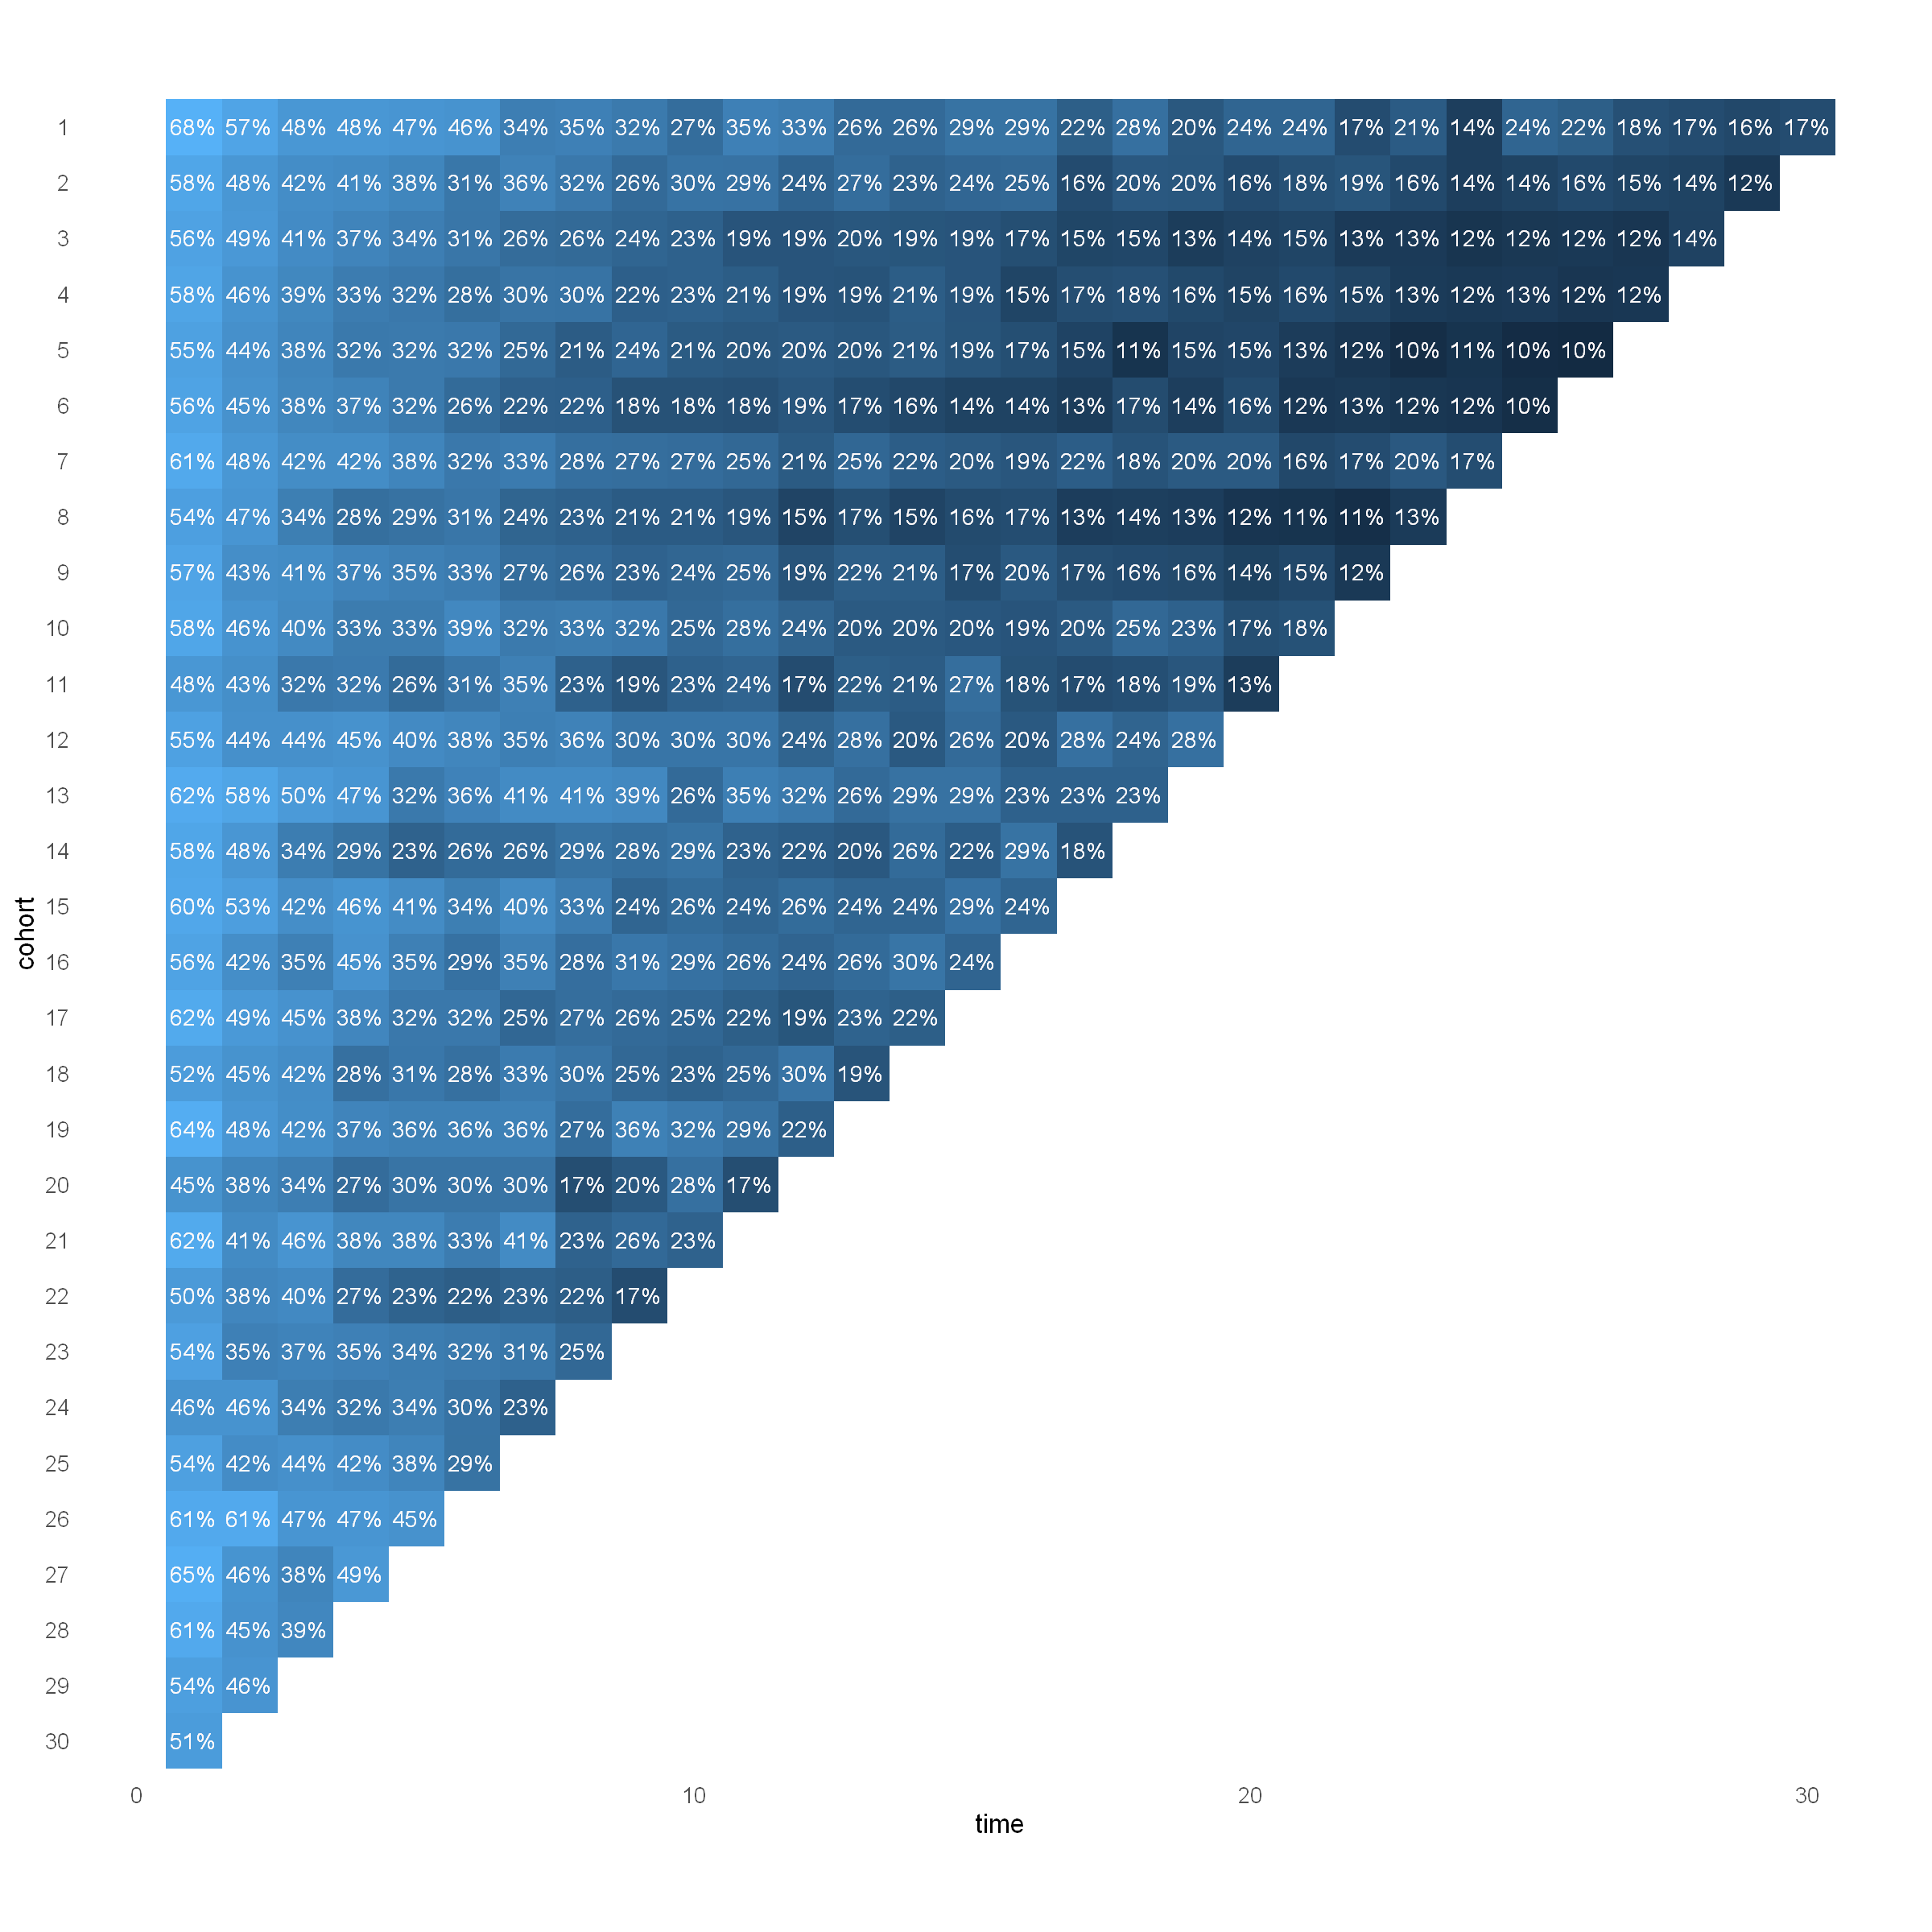

In [18]:
options(
  repr.plot.width = 20,  # Ancho del gráfico en pulgadas.
  repr.plot.height = 20  # Altura del gráfico en pulgadas.
)


ggplot(data = gamelaunch_long, aes(x = time, y = reorder(cohort, desc(cohort)))) +
  # Crea una cuadrícula de mosaico donde:
  # - `x = time` representa el eje horizontal (días desde el inicio de la cohorte).
  # - `y = reorder(cohort, desc(cohort))` organiza las cohortes de forma descendente en el eje vertical.
  geom_raster(aes(fill = log(value))) +
  
  # Asegura que los mosaicos sean cuadrados, ajustando la proporción entre los ejes.
  coord_equal(ratio = 1) +
  
  # Agrega texto en cada mosaico, mostrando el valor redondeado a porcentajes.
  # Usa `glue::glue` para crear etiquetas personalizadas como "X%".
  geom_text(aes(label = glue::glue("{round(value, 0)}%")), size = 6, colour = "snow") +
  
  # Define un gradiente de colores basado en el logaritmo de los valores.
  # `guide = "none"` oculta la leyenda asociada al gradiente.
  scale_fill_gradient(guide = "none") +
  
  # Aplica un tema minimalista para eliminar elementos innecesarios como líneas de cuadrícula y bordes.
  theme_minimal(base_size = 20) +
  theme(panel.grid = element_blank(), panel.border = element_blank()) +
  
  # Agrega etiquetas al gráfico.
  labs(y = "cohort")

In [19]:
cohortTable_week <- gamelaunch %>%
  # 1. Creamos una nueva columna `week_start` que indica el inicio de la semana para cada fecha en `eventDate`.
  #    Utilizamos `floor_date()` del paquete `lubridate` para redondear las fechas al inicio de la semana.
  mutate(week_start = floor_date(eventDate, 'week')) %>%
  
  # 2. Eliminamos duplicados para mantener solo una fila por combinación de `week_start` y `userid`.
  #    `.keep_all = TRUE` asegura que todas las columnas restantes del dataframe original sean conservadas.
  distinct(week_start, userid, .keep_all = TRUE) %>%
  
  # 3. Creamos una tabla de cohortes semanal, agrupando por `userid` (identificador único) y `week_start` (inicio de la semana).
  cohort_table_day(id_var = userid, date = week_start) %>%
  
  # 4. Ajustamos la tabla desplazando las columnas hacia la izquierda.
  #    Esto asegura que las cohortes estén alineadas para facilitar la interpretación.
  shift_left() %>%
  
  # 5. Reemplazamos los valores iguales a 0 con cadenas vacías para limpiar la tabla.
  #    Esto mejora la legibilidad eliminando ceros innecesarios.
  mutate_all(~ ifelse(. == 0, "", .))

cohortTable_week

cohort,t0,t1,t2,t3,t4
<int>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,1053,699,471,342,284
2,1772,929,689,518,
3,524,322,231,,
4,382,212,,,
5,263,,,,


In [20]:
cohortTable_week <- gamelaunch %>%
  # 1. Agregamos una columna `week_start` con el inicio de la semana de cada `eventDate`.
  #    Utilizamos `floor_date()` del paquete `lubridate` para redondear las fechas al inicio de la semana.
  mutate(week_start = floor_date(eventDate, 'week')) %>%
  
  # 2. Filtramos filas duplicadas, dejando solo una fila por combinación de `week_start` y `userid`.
  #    `.keep_all = TRUE` asegura que las demás columnas del dataframe original sean conservadas.
  distinct(week_start, userid, .keep_all = TRUE) %>%
  
  # 3. Generamos una tabla de cohortes semanales, agrupando por `userid` y `week_start`.
  #    Cada fila representa una cohorte semanal y las columnas los días posteriores al inicio.
  cohort_table_day(id_var = userid, date = week_start) %>%
  
  # 4. Ajustamos la tabla desplazando las columnas hacia la izquierda y normalizamos los valores a porcentajes.
  #    Esto permite comparar la retención relativa entre cohortes.
  shift_left_pct() %>%
  
  # 5. Reemplazamos los valores iguales a 0 con cadenas vacías para mejorar la legibilidad.
  mutate_all(~ ifelse(. == 0, "", .))
cohortTable_week

cohort,t0,t1,t2,t3,t4
<int>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,100,66.4,44.7,32.5,27
2,100,52.4,38.9,29.2,
3,100,61.5,44.1,,
4,100,55.5,,,
5,100,,,,


## <font color='#3d59c6'>  3. ANÁLISIS DE SUPERVIVENCIA </font>

En este caso vamos a analizar los datos obtenidos desde la óptica del *user churn* mediante el uso de survival analyisis.

- **churn:** Usuarios que utilizaron la app en algún momento y que dejaron de usarla durante un periodo de al menos 7 días.

- **Datos censurados en el dataset**:
  En el análisis de retención, un usuario es censurado si su actividad no se registra después del último evento disponible. Por ejemplo:
  - Si un usuario juega 3 días seguidos y no vuelve a aparecer, la duración registrada será censurada.

¿Qué haremos nosotros? reducir nuestro dataset a una instancia por usuario y haremos una serie de cálculos para categorizar cada usuario según la definición de churn.

In [21]:
table(gamelaunch$eventName)


gameStarted   newPlayer 
      25222        4102 

In [22]:
head(gamelaunch)
summary(gamelaunch)

userid,eventDate,eventName
<chr>,<dttm>,<chr>
7479a3b347cb2e174ef83afb4211277279f82ce8c6236457f087ad8992d07ffc,2016-05-24,gameStarted
1852e89f7d86b4a0fc29f72bb8c5794d558d61fba1c5acb7cc271bf3ce76e832,2016-05-24,gameStarted
bda71b9de88cd162831d89582480554b7db31bc6b3219c8c92e1ad97aa620942,2016-05-24,gameStarted
29b194585a20e1763b3a92b10eb5af3d593c6767213bd31cebac2a1f4391bc58,2016-05-24,gameStarted
bcb495e6ec9f290f4a44b826098e1e319710dffa9565ae0e5f1066bee2ebdf05,2016-05-24,gameStarted
361e53b758ed3526442f689b8c8104ac8446426d976536f66d8a36ff97df8d88,2016-05-24,gameStarted


    userid            eventDate                       eventName        
 Length:29324       Min.   :2016-04-27 00:00:00.00   Length:29324      
 Class :character   1st Qu.:2016-05-04 00:00:00.00   Class :character  
 Mode  :character   Median :2016-05-10 00:00:00.00   Mode  :character  
                    Mean   :2016-05-11 06:30:26.75                     
                    3rd Qu.:2016-05-18 00:00:00.00                     
                    Max.   :2016-05-27 00:00:00.00                     

In [23]:
# Modificamos el dataframe `gamelaunch` para abreviar los valores de la columna `userid`.
gamelaunch <- gamelaunch %>%
  # Usamos `mutate` para transformar `userid` en una versión abreviada.
  # La función `abbreviate` toma cada valor único y lo convierte en una abreviatura más corta.
  mutate(userid = abbreviate(userid))

# Mostramos las primeras filas del dataframe actualizado.
head(gamelaunch)

userid,eventDate,eventName
<chr>,<dttm>,<chr>
7479,2016-05-24,gameStarted
1852,2016-05-24,gameStarted
b7198,2016-05-24,gameStarted
2919,2016-05-24,gameStarted
b495,2016-05-24,gameStarted
36153,2016-05-24,gameStarted


In [24]:
maxUserDate <- gamelaunch %>%
  # Agrupamos los datos por `userid` para realizar cálculos por usuario.
  group_by(userid) %>%
  
  # Calculamos dos nuevas columnas:
  # - `minDate`: La fecha mínima (la primera vez que se observó al usuario).
  # - `maxDate`: La fecha máxima (la última vez que se observó al usuario).
  summarise(
    minDate = as.Date(min(eventDate)),  # Convertimos la fecha mínima a tipo `Date`.
    maxDate = as.Date(max(eventDate))   # Convertimos la fecha máxima a tipo `Date`.
  )

# Mostramos las primeras filas del dataframe resultante.
head(maxUserDate)

userid,minDate,maxDate
<chr>,<date>,<date>
0000,2016-05-27,2016-05-27
00090,2016-05-02,2016-05-03
00092,2016-05-05,2016-05-08
0010,2016-05-03,2016-05-16
00160,2016-04-30,2016-05-03
00167,2016-05-03,2016-05-17


In [25]:
# El churn es un concepto relativo a cada fecha. 
# En este caso hacemos el análisis referenciado a la última fecha disponible
# También incluimos la fecha máxima hasta la que podemos calcular el churn


# Añadimos una nueva columna `latestDate`, que representa la última fecha disponible para el análisis.
maxUserDate['latestDate'] <- as.Date('2016-05-27')

# Añadimos otra columna `latestDateLag7Days`, que es 7 días antes de la última fecha disponible.
maxUserDate['latestDateLag7Days'] <- as.Date('2016-05-20')

# Calculamos los días desde la última visita de cada usuario hasta la fecha de referencia (`latestDate`).
# Esto nos ayudará a identificar usuarios inactivos o con churn.
maxUserDate$DiasUltVisita <- as.numeric(maxUserDate$latestDate - maxUserDate$maxDate)

# Calculamos los días activos totales de cada usuario, desde la fecha mínima hasta la máxima (incluyendo ambos días).
maxUserDate$DiasActivos <- as.numeric(maxUserDate$maxDate - maxUserDate$minDate) + 1

# Mostramos las primeras 10 filas del dataframe resultante.
head(maxUserDate, 10)

userid,minDate,maxDate,latestDate,latestDateLag7Days,DiasUltVisita,DiasActivos
<chr>,<date>,<date>,<date>,<date>,<dbl>,<dbl>
0000,2016-05-27,2016-05-27,2016-05-27,2016-05-20,0,1
00090,2016-05-02,2016-05-03,2016-05-27,2016-05-20,24,2
00092,2016-05-05,2016-05-08,2016-05-27,2016-05-20,19,4
0010,2016-05-03,2016-05-16,2016-05-27,2016-05-20,11,14
00160,2016-04-30,2016-05-03,2016-05-27,2016-05-20,24,4
00167,2016-05-03,2016-05-17,2016-05-27,2016-05-20,10,15
0019,2016-05-11,2016-05-11,2016-05-27,2016-05-20,16,1
0023,2016-05-02,2016-05-02,2016-05-27,2016-05-20,25,1
00253,2016-05-23,2016-05-27,2016-05-27,2016-05-20,0,5


In [26]:
# Inicializamos la columna `ind_churn` como NA, indicando que inicialmente no se evalúa el estado de churn.
maxUserDate$ind_churn <- NA

# Condición 1: Si `DiasUltVisita` es mayor a 7, el usuario es marcado como "churn" (1).
maxUserDate$ind_churn[maxUserDate['DiasUltVisita'] > 7] <- 1

# Condición 2: Si `DiasUltVisita` es menor o igual a 6, el usuario es considerado activo (0).
maxUserDate$ind_churn[maxUserDate['DiasUltVisita'] <= 6] <- 0

# Condición 3: Si `minDate` es mayor a `latestDateLag7Days`, el usuario es nuevo y no se evalúa su estado de churn (NA).
maxUserDate$ind_churn[maxUserDate['minDate'] > maxUserDate['latestDateLag7Days']] <- NA

# Mostramos las primeras 10 filas del dataframe actualizado.
head(maxUserDate, 10)

userid,minDate,maxDate,latestDate,latestDateLag7Days,DiasUltVisita,DiasActivos,ind_churn
<chr>,<date>,<date>,<date>,<date>,<dbl>,<dbl>,<dbl>
0000,2016-05-27,2016-05-27,2016-05-27,2016-05-20,0,1,NA
00090,2016-05-02,2016-05-03,2016-05-27,2016-05-20,24,2,1
00092,2016-05-05,2016-05-08,2016-05-27,2016-05-20,19,4,1
0010,2016-05-03,2016-05-16,2016-05-27,2016-05-20,11,14,1
00160,2016-04-30,2016-05-03,2016-05-27,2016-05-20,24,4,1
00167,2016-05-03,2016-05-17,2016-05-27,2016-05-20,10,15,1
0019,2016-05-11,2016-05-11,2016-05-27,2016-05-20,16,1,1
0023,2016-05-02,2016-05-02,2016-05-27,2016-05-20,25,1,1
00253,2016-05-23,2016-05-27,2016-05-27,2016-05-20,0,5,NA


1. `userid`:
- Identificador único de cada usuario.

2. `minDate` y `maxDate`:
- `minDate`: Fecha de la primera actividad del usuario.
- `maxDate`: Fecha de la última actividad registrada del usuario.

3. `latestDate` y `latestDateLag7Days`:
- `latestDate`: Fecha de referencia máxima (2016-05-27), utilizada para evaluar el estado de churn.
- `latestDateLag7Days`: Fecha de referencia 7 días antes de latestDate (2016-05-20), utilizada para identificar usuarios nuevos que no pueden ser evaluados para churn.

4. `DiasUltVisita`:
- Días entre la última actividad del usuario (maxDate) y la fecha de referencia (latestDate).
- Permite identificar si el usuario ha estado inactivo por más de 7 días.

5. `DiasActivos`:
- Número total de días que el usuario estuvo activo, desde minDate hasta maxDate.

6. `ind_churn`:
- Indicador de churn, calculado con las siguientes reglas:
    - 1: El usuario hizo churn (estuvo inactivo más de 7 días).
    - 0: El usuario sigue activo (ha estado inactivo 6 días o menos).
    - NA: Usuarios que ingresaron recientemente (después del latestDateLag7Days) y no pueden ser evaluados.

In [27]:
columnName = maxUserDate$ind_churn        
columnName = factor(columnName)
counts = table(columnName)
print(counts)

columnName
   0    1 
1312 2278 


In [28]:
# En vez de utilizar cohortes diarios haremos un cálculo de cohortes semanales
maxUserDate$cohortWeek = floor_date(maxUserDate$minDate, 'week')
head(maxUserDate)

userid,minDate,maxDate,latestDate,latestDateLag7Days,DiasUltVisita,DiasActivos,ind_churn,cohortWeek
<chr>,<date>,<date>,<date>,<date>,<dbl>,<dbl>,<dbl>,<date>
0000,2016-05-27,2016-05-27,2016-05-27,2016-05-20,0,1,NA,2016-05-22
00090,2016-05-02,2016-05-03,2016-05-27,2016-05-20,24,2,1,2016-05-01
00092,2016-05-05,2016-05-08,2016-05-27,2016-05-20,19,4,1,2016-05-01
0010,2016-05-03,2016-05-16,2016-05-27,2016-05-20,11,14,1,2016-05-01
00160,2016-04-30,2016-05-03,2016-05-27,2016-05-20,24,4,1,2016-04-24
00167,2016-05-03,2016-05-17,2016-05-27,2016-05-20,10,15,1,2016-05-01


### <font color='#3d59c6'>  3.1 CÁLCULOS DE ANÁLISIS DE SUPERVIVENCIA </font>
Una vez hemos generado la categorización de los usuarios estamos listos para hacer el análisis de supervivencia. Para ello utilizaremos la librería survival.

In [29]:
# Paso 1: Filtrar datos con churn definido

userData <- maxUserDate %>%
  # Filtramos las filas donde `ind_churn` no es NA, es decir, solo usuarios con un estado de churn definido.
  filter(ind_churn >= 0)


# Paso 2: Crear el objeto de supervivencia
s <- Surv(
  userData$DiasActivos,  # Tiempo hasta que ocurre el churn (días activos).
  userData$ind_churn     # Indicador de churn: 1 para churn, 0 para activo.
)

# Paso 3: Inspeccionar el tipo de dato
class(s)  # Verificamos la clase del objeto de supervivencia.

head(s,10)
head(userData, 10)

[1] "Surv"

 [1]  2   4  14   4  15   1   1  29+ 14+ 19+

userid,minDate,maxDate,latestDate,latestDateLag7Days,DiasUltVisita,DiasActivos,ind_churn,cohortWeek
<chr>,<date>,<date>,<date>,<date>,<dbl>,<dbl>,<dbl>,<date>
00090,2016-05-02,2016-05-03,2016-05-27,2016-05-20,24,2,1,2016-05-01
00092,2016-05-05,2016-05-08,2016-05-27,2016-05-20,19,4,1,2016-05-01
0010,2016-05-03,2016-05-16,2016-05-27,2016-05-20,11,14,1,2016-05-01
00160,2016-04-30,2016-05-03,2016-05-27,2016-05-20,24,4,1,2016-04-24
00167,2016-05-03,2016-05-17,2016-05-27,2016-05-20,10,15,1,2016-05-01
0019,2016-05-11,2016-05-11,2016-05-27,2016-05-20,16,1,1,2016-05-08
0023,2016-05-02,2016-05-02,2016-05-27,2016-05-20,25,1,1,2016-05-01
00255,2016-04-29,2016-05-27,2016-05-27,2016-05-20,0,29,0,2016-04-24
00303,2016-05-13,2016-05-26,2016-05-27,2016-05-20,1,14,0,2016-05-08


In [30]:
# La función survfit nos hace el análisis de supervivencia
survfit(s~1)

Call: survfit(formula = s ~ 1)

        n events median 0.95LCL 0.95UCL
[1,] 3590   2278      9       8      10

1. `n` El número total de observaciones incluidas en el análisis:
- En este caso, hay 3590 usuarios en el análisis.

2. `events` El número total de eventos observados (churn):
- Aquí, 2278 usuarios han hecho churn.

3. `median` El tiempo mediano de supervivencia, es decir, el tiempo en el que el 50% de los usuarios han hecho churn:
- En este caso, la mediana es de 9 días.

4. `0.95LCL` y `0.95UCL` Intervalo de confianza al 95% para la mediana de supervivencia:
    - `0.95LCL` (Lower Confidence Limit): Límite inferior del intervalo de confianza (8 días).
    - `0.95UCL` (Upper Confidence Limit): Límite superior del intervalo de confianza (10 días).
- Esto indica que estamos 95% seguros de que el tiempo mediano de supervivencia está entre 8 y 10 días.

In [31]:
summary(survfit(s~1))

Call: survfit(formula = s ~ 1)

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    1   3590     876    0.756 0.00717        0.742        0.770
    2   2714     271    0.681 0.00778        0.665        0.696
    3   2440     165    0.634 0.00804        0.619        0.650
    4   2270      97    0.607 0.00815        0.592        0.624
    5   2164      95    0.581 0.00824        0.565        0.597
    6   2054      93    0.554 0.00831        0.538        0.571
    7   1940      75    0.533 0.00835        0.517        0.550
    8   1844      76    0.511 0.00837        0.495        0.528
    9   1741      58    0.494 0.00839        0.478        0.511
   10   1648      58    0.477 0.00840        0.460        0.493
   11   1566      61    0.458 0.00840        0.442        0.475
   12   1474      52    0.442 0.00840        0.426        0.459
   13   1393      54    0.425 0.00839        0.409        0.442
   14   1308      42    0.411 0.00838        0.395        0.428
   15   

1. `time` Días transcurridos desde el inicio del análisis.
- Por ejemplo, en el día 1, se evalúa la supervivencia de los usuarios hasta ese momento.

2. `n.risk` Número de usuarios en riesgo al comienzo del intervalo.
- Estos usuarios aún no han hecho churn ni han sido censurados hasta ese punto.

3. `n.event`:
- Número de eventos (churn) que ocurrieron en ese día específico.
    - Por ejemplo, en el día 1, 876 usuarios hicieron churn.

4. `survival`Probabilidad de supervivencia acumulada (Kaplan-Meier) hasta ese día.
- Representa el porcentaje de usuarios que permanecen activos al final del intervalo.
- Por ejemplo:
    - Al final del día 1, el 75.6% de los usuarios todavía estaban activos (supervivencia = 0.756).

5. `std.err` Error estándar asociado a la estimación de la probabilidad de supervivencia.
- Un error estándar más bajo indica mayor precisión en la estimación.

6. `lower 95% CI` y `upper 95% CI` Intervalo de confianza al 95% para la probabilidad de supervivencia.
- Ejemplo:
    - Para el día 1, la supervivencia estimada es 0.756, pero el intervalo de confianza al 95% está entre 0.742 y 0.770.
- Esto significa que estamos 95% seguros de que la verdadera probabilidad de supervivencia está dentro de ese rango.

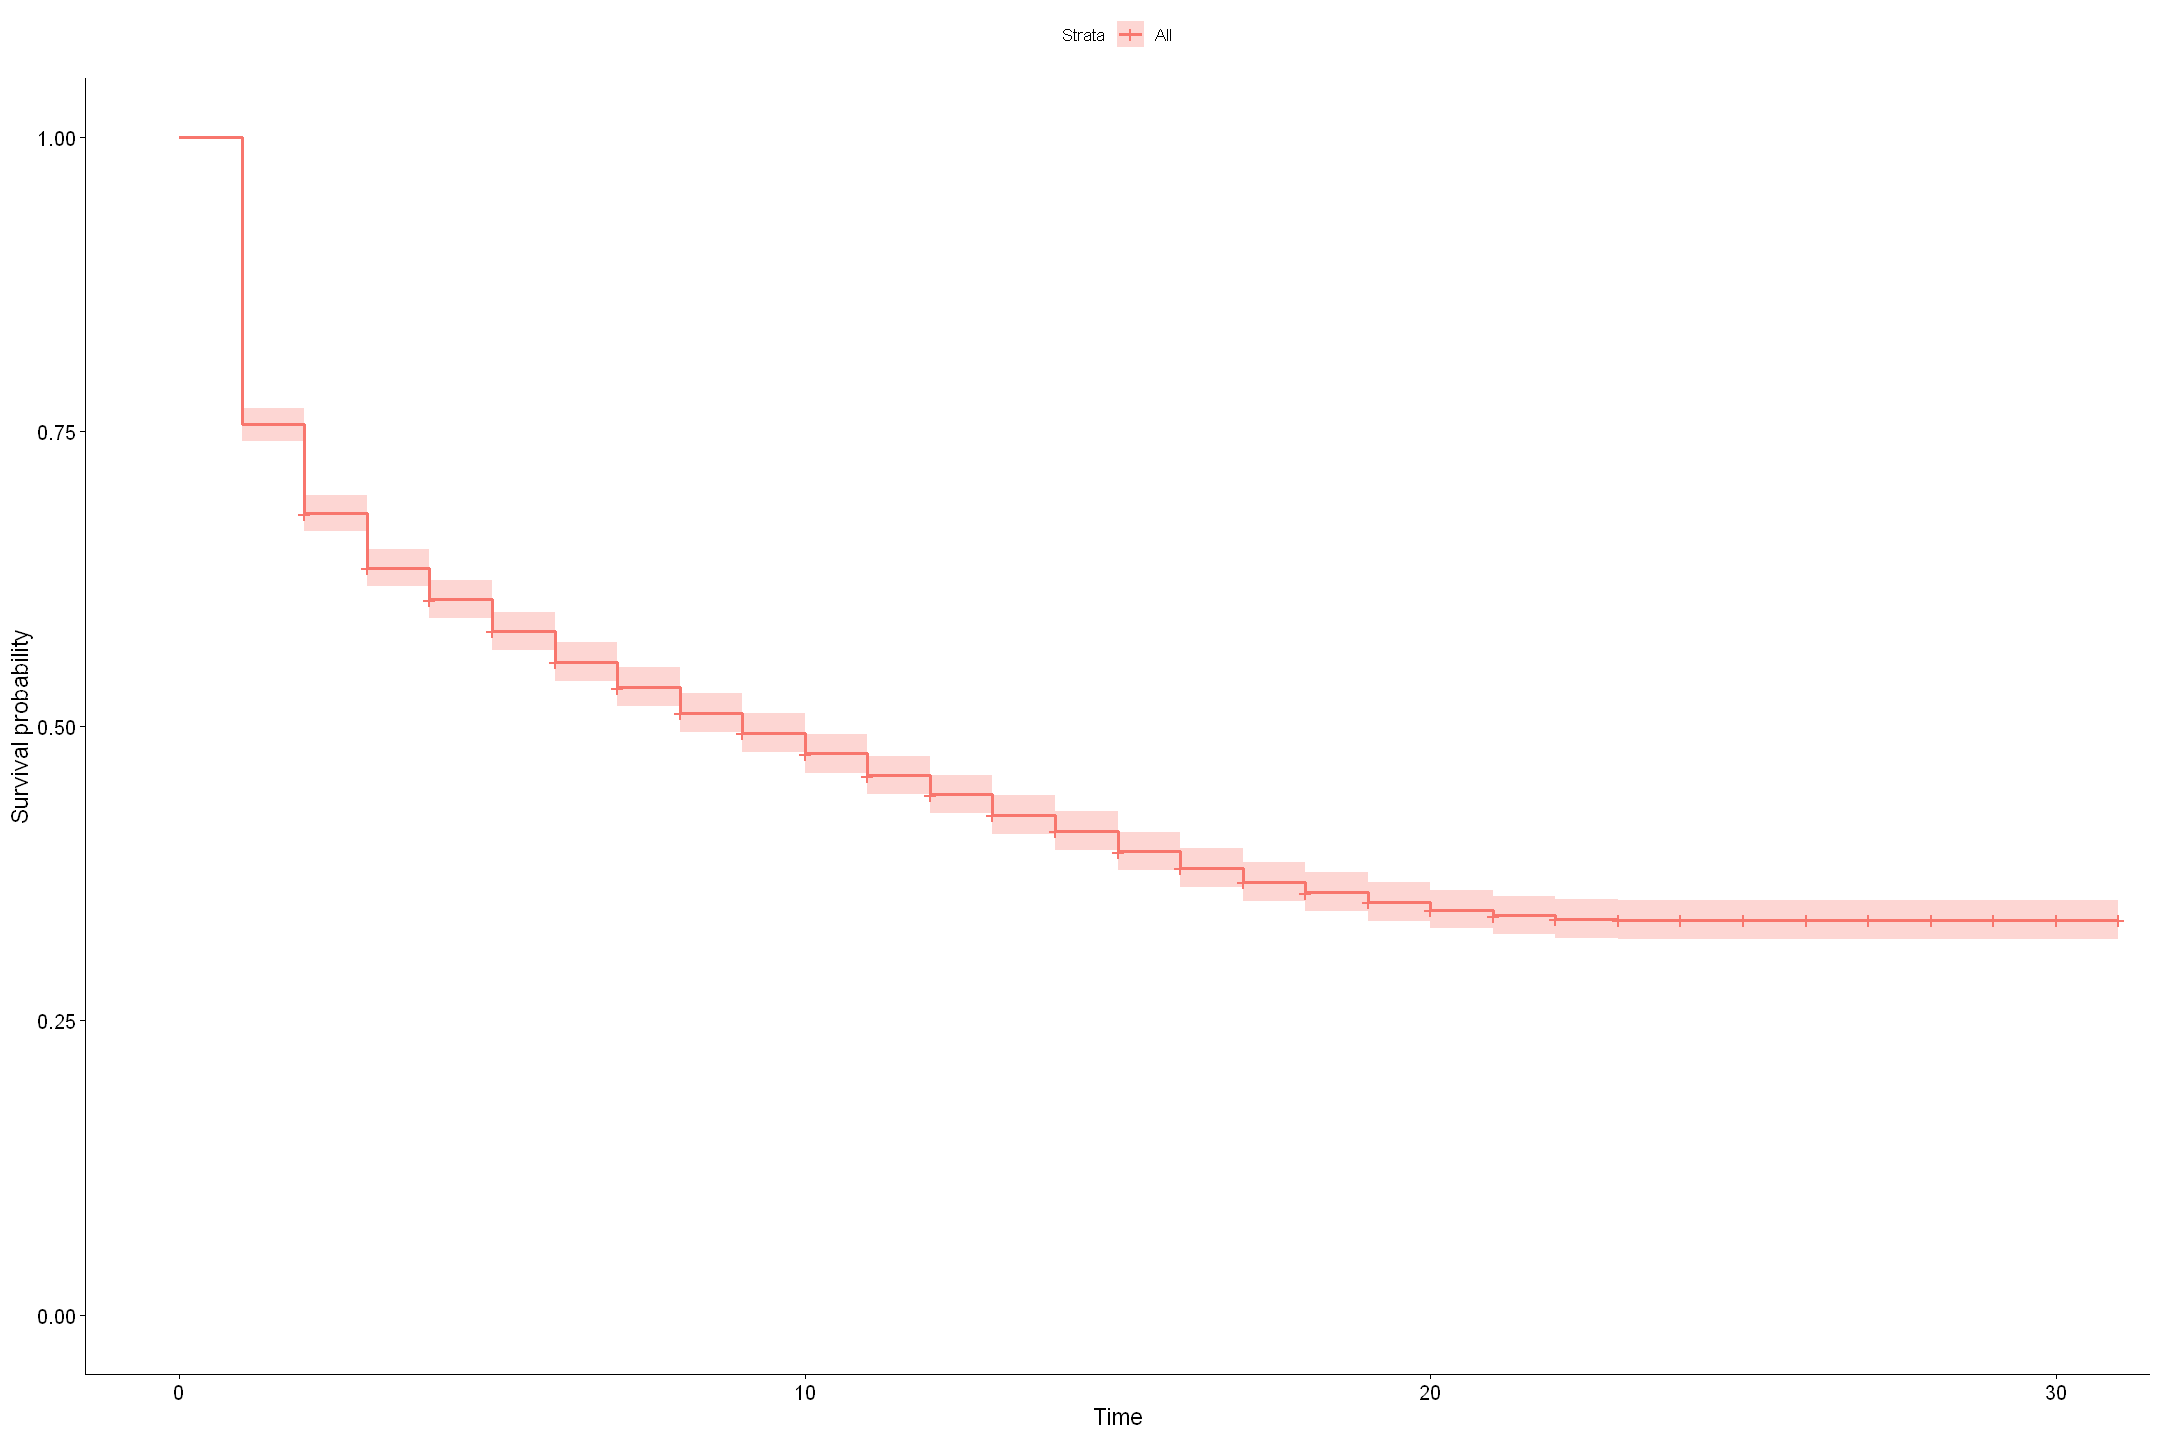

In [32]:
options(
  repr.plot.width = 18,  
  repr.plot.height = 12  
)

# La librería survminer nos ayuda a generar survival plots con formato, intervalos de confianza...
# Calculamos el modelo de supervivencia Kaplan-Meier utilizando la función survfit.
sfit <- survfit(Surv(userData$DiasActivos, userData$ind_churn) ~ 1, data = userData)

# Usamos ggsurvplot para visualizar el modelo de supervivencia con un gráfico.
ggsurvplot(sfit)

**Propósito**
Visualizar la probabilidad de supervivencia (usuarios activos) a lo largo del tiempo, utilizando un modelo Kaplan-Meier.

1. Eje X (Time):
- Representa el tiempo en días activos desde el inicio de la actividad del usuario.

2. Eje Y (Survival probability):
- Representa la probabilidad acumulada de que los usuarios permanezcan activos.
- Ejemplo: Si en el día 10 la probabilidad es 0.5, significa que el 50% de los usuarios todavía están activos.

3. Línea escalonada:
- La curva desciende escalonadamente, reflejando los eventos de churn que ocurren en días específicos.

4. Intervalos de confianza:
- El área sombreada alrededor de la curva muestra el intervalo de confianza al 95%, proporcionando una medida de incertidumbre en la estimación.

**Análisis**
- Al inicio (día 0), la probabilidad de "supervivencia" es 1, ya que todos los usuarios están activos.
- La probabilidad de supervivencia disminuye con el tiempo debido al churn.
- Alrededor del día 30, la probabilidad de supervivencia es aproximadamente 0.33 (33% de los usuarios siguen activos).

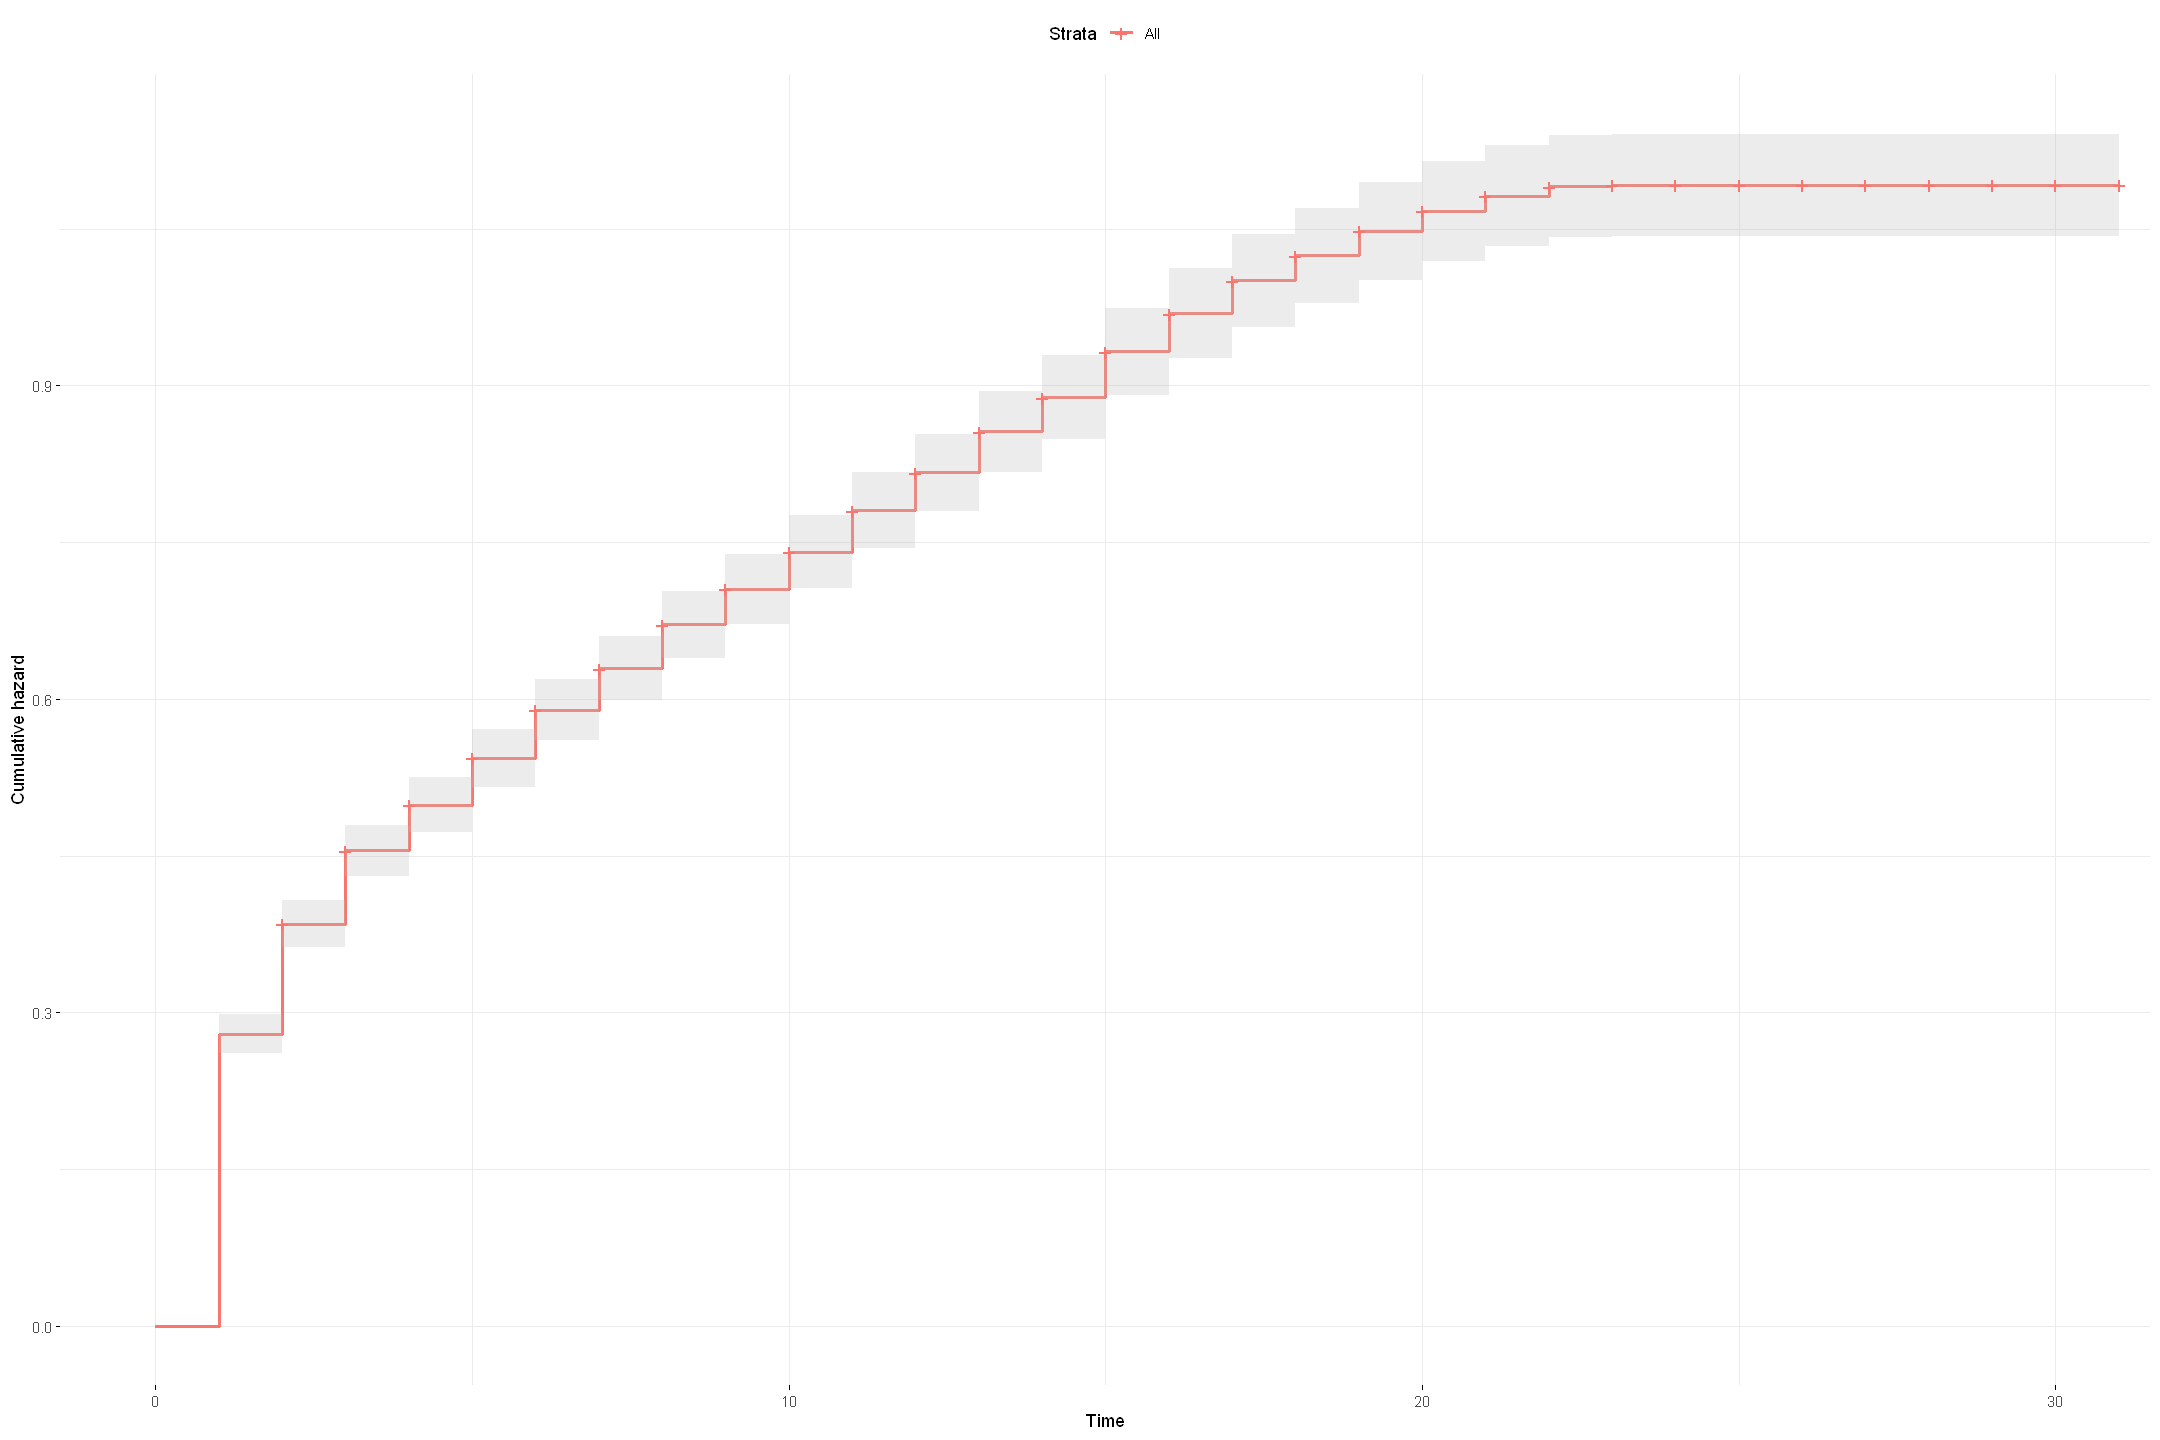

In [33]:
# Generamos un gráfico de riesgo acumulado con ggsurvplot.
ggsurvplot(
  survfit(Surv(DiasActivos, ind_churn) ~ 1, data = userData),  # Modelo Kaplan-Meier global.
  fun = "cumhaz",                                             # Especificamos que queremos el riesgo acumulado.
  conf.int = TRUE,                                            # Incluimos intervalos de confianza.
  ggtheme = theme_minimal(),                                  # Aplicamos un tema minimalista para el gráfico.
  palette = "viridis"                                         # Usamos la paleta "viridis" para los colores.
)

**Propósito**
Mostrar el riesgo acumulado de churn a lo largo del tiempo, proporcionando información sobre cómo se acumula el abandono de usuarios.

1. Eje X (Time):
- Representa el tiempo en días activos.

2. Eje Y (Cumulative hazard):
- Representa el riesgo acumulado de churn hasta un momento específico.
    - Ejemplo: Un riesgo acumulado de 1 al final indica que la acumulación del riesgo es alta.

3. Línea escalonada:
- La curva crece escalonadamente, reflejando los eventos de churn que ocurren con el tiempo.

4. Intervalos de confianza:
- El área sombreada alrededor de la curva muestra el intervalo de confianza al 95%.

**Análisis**
- La curva comienza en 0 porque no hay riesgo acumulado en el día inicial.
- El riesgo acumulado aumenta a medida que los usuarios hacen churn.
- Alrededor del día 30, el riesgo acumulado alcanza aproximadamente 1.

Call: survfit(formula = Surv(DiasActivos, ind_churn) ~ cohortWeek, 
    data = userData)

                         n events median 0.95LCL 0.95UCL
cohortWeek=2016-04-24 1037    731     10       8      11
cohortWeek=2016-05-01 1740   1182      8       7       9
cohortWeek=2016-05-08  511    262     10       7      NA
cohortWeek=2016-05-15  302    103     NA      NA      NA


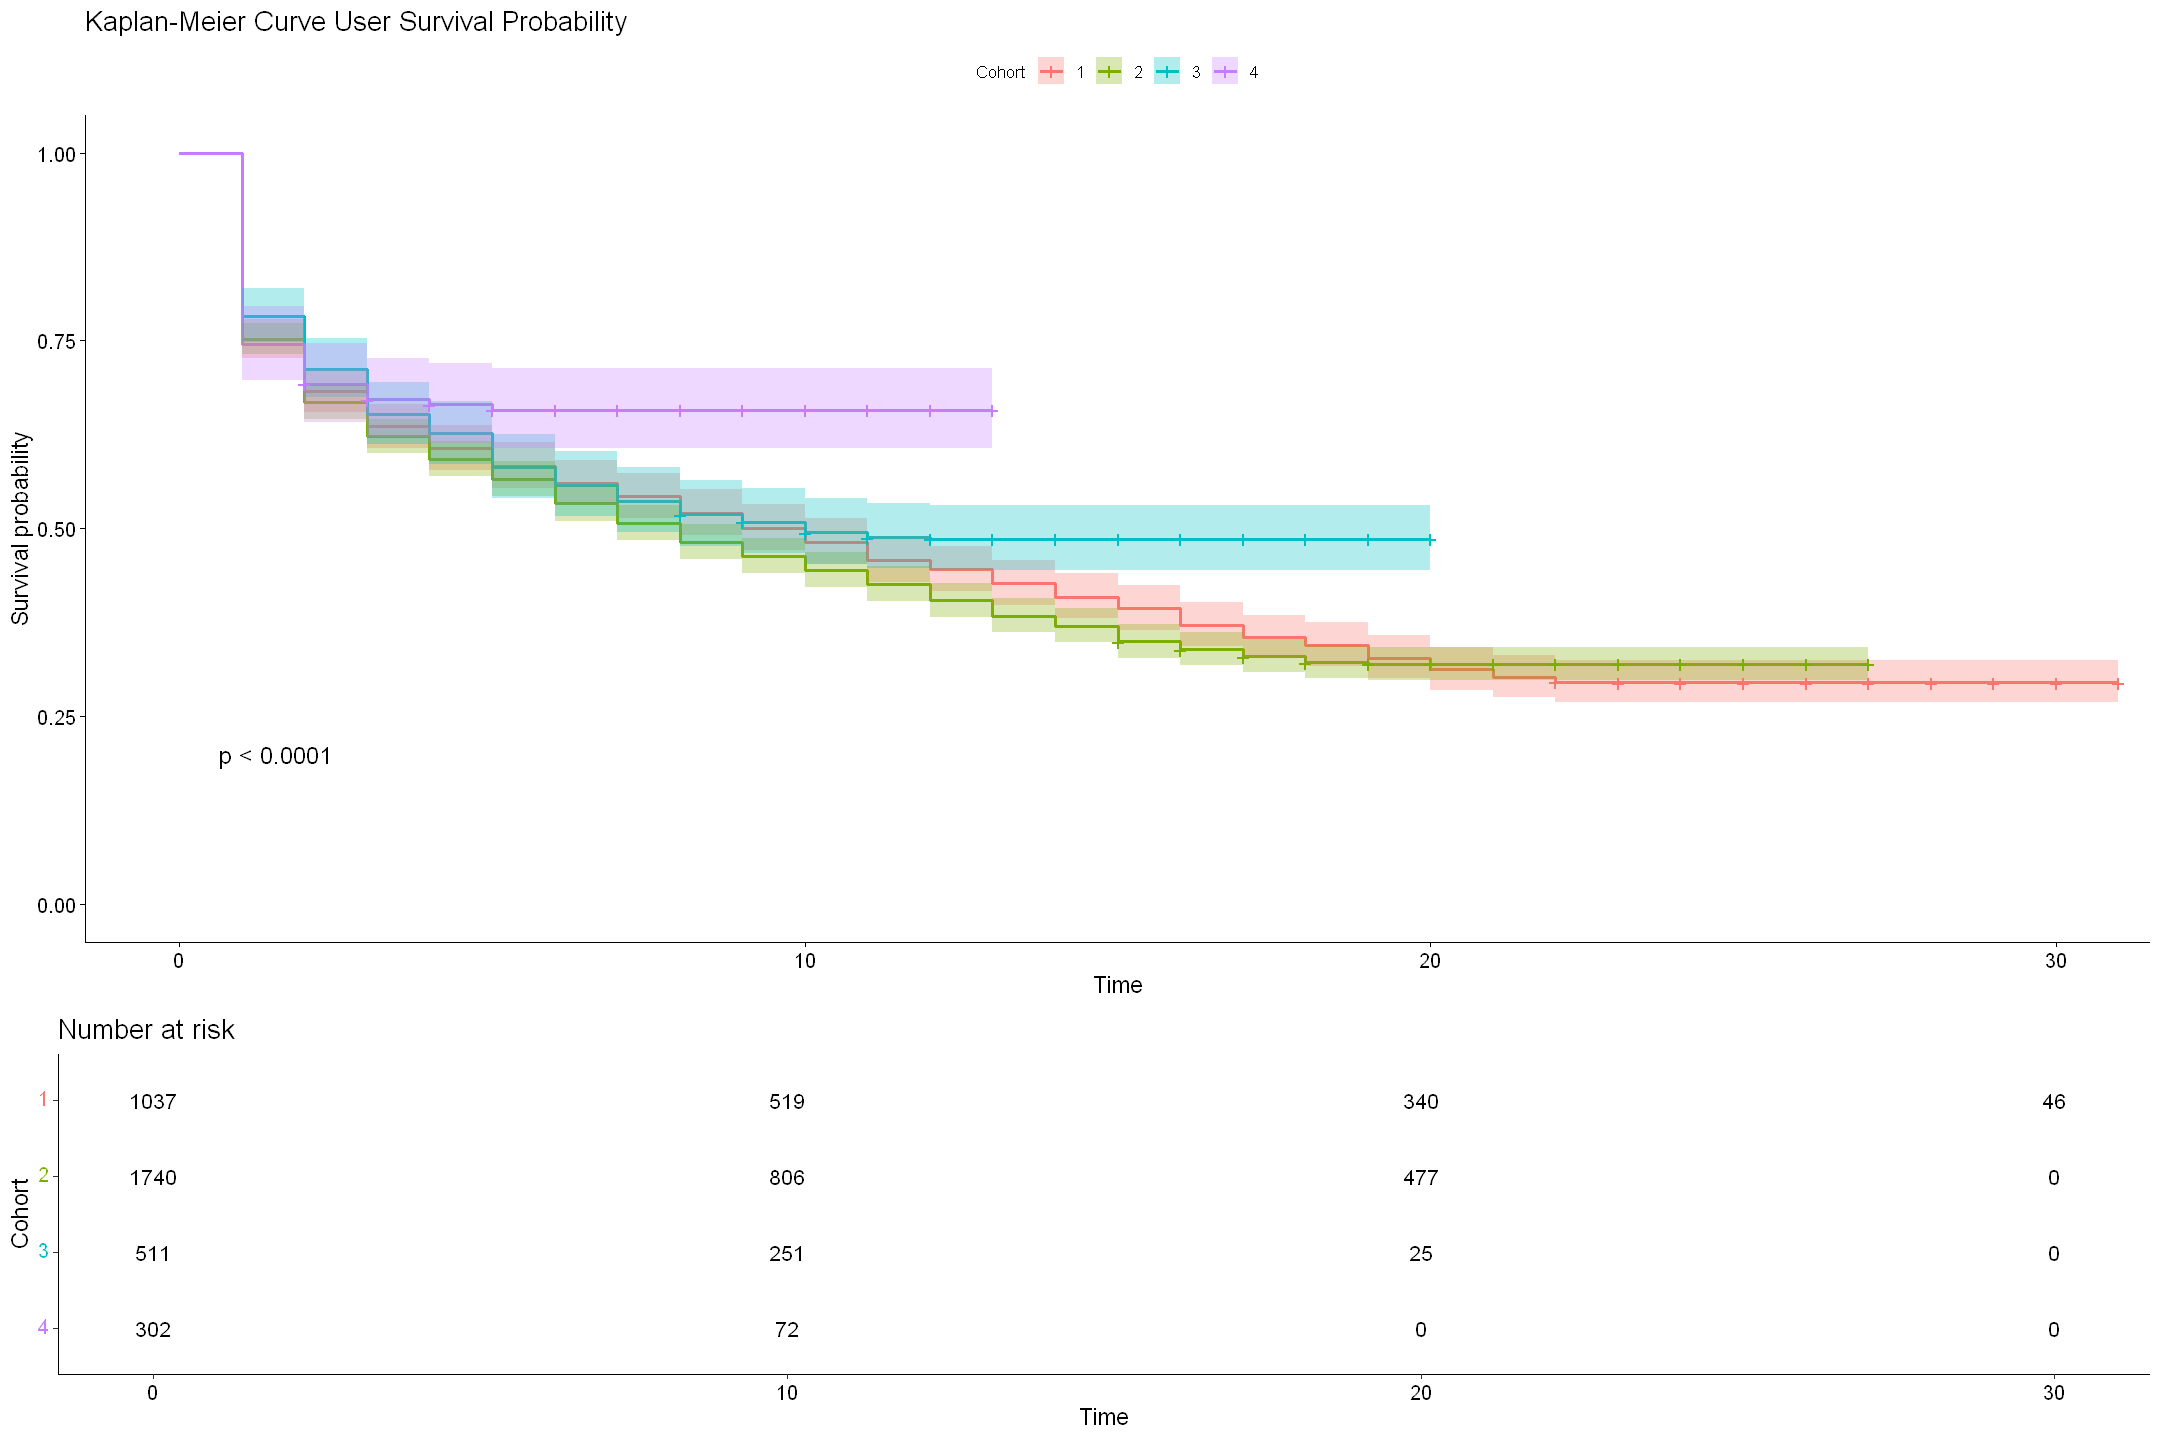

In [34]:
# Paso 1: Crear el modelo de supervivencia por cohortes
sfitByWeek = survfit(Surv(DiasActivos, ind_churn)~cohortWeek # cohortWeek indica la semana en la que el usuario fue adquirido
                      , data=userData)
# Paso 2: Verificar el modelo
print(sfitByWeek)

# Finalmente podemos aplicar una visión más completa sobre nuestro análisis para todos los cohortes
## cohortWeek=2016-04-24 1037 == "1"
## cohortWeek=2016-05-01 == "2"
## cohortWeek=2016-05-08 == "3"
## cohortWeek=2016-05-15 == "4"

ggsurvplot(
    sfitByWeek,                  # Modelo Kaplan-Meier por cohortes.
    conf.int = TRUE,             # Muestra intervalos de confianza.
    pval = TRUE,                 # Incluye el valor p para comparar curvas.
    risk.table = TRUE,           # Muestra una tabla con usuarios en riesgo.
    legend.labs = c("1", "2", "3", "4"),  # Etiquetas de las cohortes en la leyenda.
    legend.title = "Cohort",     # Título de la leyenda.
    title = "Kaplan-Meier Curve User Survival Probability",  # Título del gráfico.
    risk.table.height = 0.30     # Ajusta la altura de la tabla de riesgos.
)

**Modelo de Riesgos Proporcionales de Cox**

El Modelo de Riesgos Proporcionales de Cox es una herramienta estadística utilizada en análisis de supervivencia para evaluar el efecto de varias variables predictoras sobre el tiempo hasta un evento. Se basa en la suposición de que los riesgos son proporcionales en el tiempo, lo que significa que las relaciones entre las variables y el riesgo no cambian con el tiempo. Este modelo no requiere especificar la distribución del tiempo hasta el evento, lo que lo hace flexible y ampliamente utilizado.

In [35]:
head(userData)

userid,minDate,maxDate,latestDate,latestDateLag7Days,DiasUltVisita,DiasActivos,ind_churn,cohortWeek
<chr>,<date>,<date>,<date>,<date>,<dbl>,<dbl>,<dbl>,<date>
00090,2016-05-02,2016-05-03,2016-05-27,2016-05-20,24,2,1,2016-05-01
00092,2016-05-05,2016-05-08,2016-05-27,2016-05-20,19,4,1,2016-05-01
0010,2016-05-03,2016-05-16,2016-05-27,2016-05-20,11,14,1,2016-05-01
00160,2016-04-30,2016-05-03,2016-05-27,2016-05-20,24,4,1,2016-04-24
00167,2016-05-03,2016-05-17,2016-05-27,2016-05-20,10,15,1,2016-05-01
0019,2016-05-11,2016-05-11,2016-05-27,2016-05-20,16,1,1,2016-05-08


In [36]:
# Ajustar el modelo de Cox
# time: variable que representa el tiempo hasta el evento
# Surv(DiasActivos, ind_churn): variable indicadora del evento (1 = evento ocurrió, 0 = censurado)
# DiasUltVisita, vaDiasActivosr2: variables predictoras
cox_model <- coxph(Surv(DiasActivos, ind_churn) ~ cohortWeek + DiasUltVisita # cohortWeek indica la semana en la que el usuario fue adquirido
                      , data=userData)

# Resumen del modelo para ver los coeficientes y su significancia
summary(cox_model)

Call:
coxph(formula = Surv(DiasActivos, ind_churn) ~ cohortWeek + DiasUltVisita, 
    data = userData)

  n= 3590, number of events= 2278 

                  coef exp(coef) se(coef)     z Pr(>|z|)    
cohortWeek    0.350790  1.420189 0.008371 41.90   <2e-16 ***
DiasUltVisita 0.512269  1.669074 0.009166 55.89   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

              exp(coef) exp(-coef) lower .95 upper .95
cohortWeek        1.420     0.7041     1.397     1.444
DiasUltVisita     1.669     0.5991     1.639     1.699

Concordance= 0.949  (se = 0.002 )
Likelihood ratio test= 7513  on 2 df,   p=<2e-16
Wald test            = 3139  on 2 df,   p=<2e-16
Score (logrank) test = 5059  on 2 df,   p=<2e-16


1. **Resumen del modelo**
- n = 3590: El número total de observaciones en el dataset.
- Número de eventos = 2278: La cantidad de observaciones en las que ocurrió el evento (en este caso, churn).

2. **Variables predictoras**
- El modelo incluye las siguientes variables:
- cohortWeek:
    - Coeficiente (coef): 0.351 (log hazard ratio).
    - Exp(coef): 1.420, lo que indica que por cada incremento unitario en la variable cohortWeek (cambio en la semana de adquisición), el riesgo de churn aumenta en un 42% (HR - 1 → 1.42 - 1 = 0.42 o 42%).
    - p-valor (<2e-16): Altamente significativo, lo que implica que esta variable tiene un impacto importante en el riesgo de churn.
- DiasUltVisita:
    - Coeficiente (coef): 0.512 (log hazard ratio).
    - Exp(coef): 1.669, indicando que por cada día adicional desde la última visita, el riesgo de churn aumenta en un 66.9% (HR - 1 → 1.669 - 1 = 0.669 o 66.9%).
    - p-valor (<2e-16): Altamente significativo, lo que implica que esta variable también tiene un fuerte impacto.

3. **Intervalos de confianza (95%)**
- cohortWeek: (1.397, 1.444). Los límites superior e inferior del HR están cerca del valor estimado, lo que indica precisión en la estimación.
DiasUltVisita: (1.639, 1.699). De nuevo, esto demuestra que la estimación del HR es confiable.

4. **Evaluación global del modelo**
- Concordance Index (C-index): 0.949. Esto mide la capacidad predictiva del modelo. Un valor cercano a 1 indica un excelente ajuste del modelo.
- Likelihood ratio test (p < 2e-16): Este test evalúa si el modelo en su conjunto es significativo. El p-valor extremadamente bajo indica que el modelo explica mucho mejor los datos que un modelo nulo (sin variables predictoras).
- Wald test y Log-rank test (p < 2e-16): Ambos confirman que las variables predictoras incluidas en el modelo tienen un efecto significativo.


**Conclusión**
1. Ambas variables predictoras (cohortWeek y DiasUltVisita) tienen un efecto significativo en el riesgo de churn.
- Los usuarios adquiridos en semanas posteriores (cohortWeek) tienen un mayor riesgo de churn.
- Los usuarios con más días desde su última visita (DiasUltVisita) también tienen un riesgo considerablemente mayor.

2. El modelo tiene un excelente ajuste predictivo, reflejado en el alto C-index (0.949).

3. Acciones recomendadas:
- Diseñar estrategias para reactivar usuarios con largos intervalos desde su última visita.
- Analizar cohortes específicas para identificar factores adicionales que contribuyan al churn.

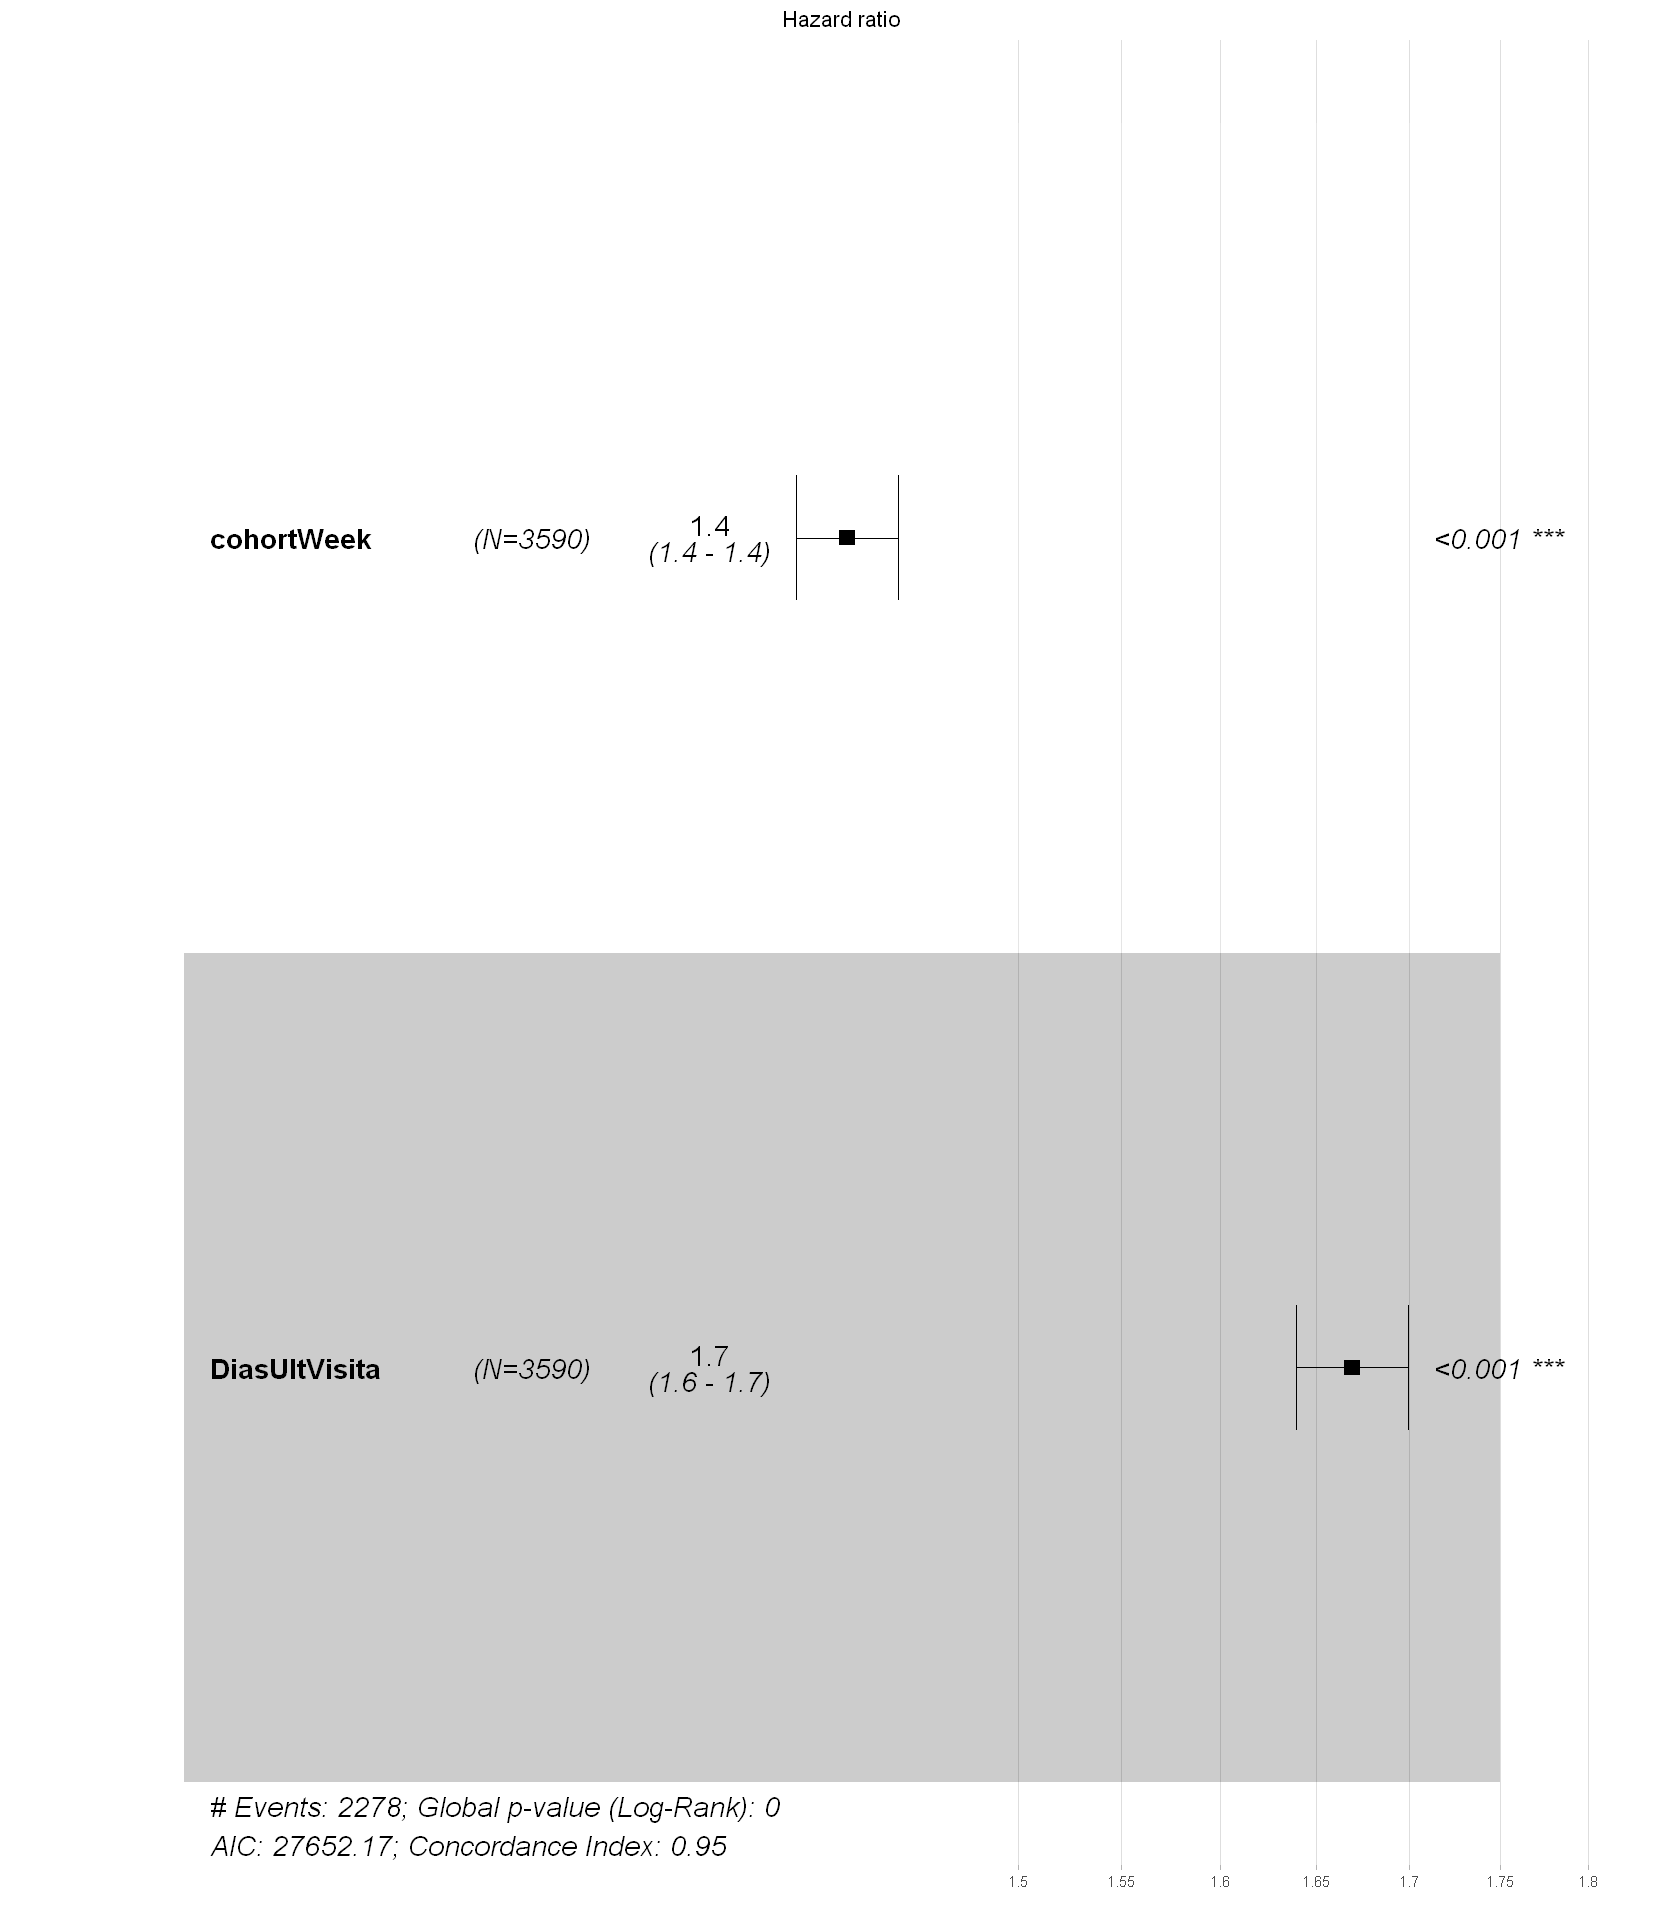

In [43]:
options(
  repr.plot.width = 14,  
  repr.plot.height = 16  
)
# Visualización del modelo con un diagrama de bosque
# Este gráfico muestra los efectos de las variables en el modelo
ggforest(cox_model, data = userData, fontsize = 1.5)

1. **Títulos y eje horizontal**:
- Eje horizontal: Representa el hazard ratio (HR), que mide el impacto de cada variable en el tiempo hasta el evento (en este caso, la probabilidad de "churn" o abandono).
    - Un HR = 1 indica que la variable no tiene efecto sobre el riesgo.
    - Un HR > 1 indica un mayor riesgo (probabilidad más alta del evento).
    - Un HR < 1 indica un menor riesgo (probabilidad más baja del evento).

2. **Variables incluidas en el modelo**:
- cohortWeek:
    - Hazard ratio (HR): 1.4 (IC 95%: 1.4 - 1.4).
    - Interpretación: Por cada unidad de cambio en la semana de adquisición del usuario, el riesgo de churn aumenta en un 40%. Este efecto es estadísticamente significativo (p < 0.001).
    - Esto sugiere que la semana de adquisición influye fuertemente en el comportamiento del usuario y su probabilidad de abandono.
- DiasUltVisita:
    - Hazard ratio (HR): 1.7 (IC 95%: 1.6 - 1.7).
    - Interpretación: Por cada día adicional desde la última visita, el riesgo de churn aumenta en un 70%. Este efecto también es estadísticamente significativo (p < 0.001).
    - Esto indica que usuarios con más días desde su última visita son mucho más propensos a abandonar.

3. **Significancia estadística**:
- Ambas variables tienen un p-valor < 0.001, denotado por los tres asteriscos (***), lo que indica una alta significancia estadística.

4. **Intervalos de confianza (IC)**:
- Los intervalos de confianza para ambos HR son extremadamente estrechos, lo que indica que las estimaciones son muy precisas.

5. **Métricas generales del modelo**:
- Eventos: 2278 usuarios experimentaron el evento (churn).
- AIC (Akaike Information Criterion): 27652.17, una métrica que evalúa la calidad del modelo (valores más bajos indican mejor ajuste).
- Concordance Index (C-index): 0.95, lo que indica que el modelo tiene un excelente poder predictivo (valores cercanos a 1 son ideales).


El modelo sugiere que tanto la semana de adquisición del usuario (`cohortWeek`) como el número de días desde su última visita (`DiasUltVisita`) son fuertes predictores del riesgo de churn. Intervenciones específicas podrían enfocarse en los usuarios que llevan más tiempo sin visitar o en cohortes específicas más vulnerables.

## <font color='#3d59c6'>  4. CONCLUSIÓN </font>

1. **Descripción del dataset:**
   - El dataset **gamelaunch** tiene **29,324 registros** y **3 variables**, representando datos de **3,994 usuarios únicos** con eventos *newPlayer* y *GameStarted*.


2. **Análisis de cohortes:**
   - Las cohortes con mejor retención son las semanas **1, 7 y 13** (retención promedio: **60%**), mientras que las semanas **11 y 20** muestran las peores tasas (menos del **30%**).
   - Se identificó un comportamiento **cíclico**, posiblemente relacionado con factores externos.


3. **Análisis de churn:**
   - **Churn** se definió como **7 días de inactividad**. La mediana del tiempo hasta churn es de **9 días** con un intervalo de confianza del **95% [8, 10 días]**.
   - La **segunda semana** muestra el mayor riesgo de churn (**30% acumulado**), mientras que la **tercera semana** tiene la mejor retención.
   

4. **Implicaciones:**
   - Las cohortes críticas (semanas **11 y 20**) requieren análisis detallado. Las estrategias exitosas de la **tercera semana** deberían replicarse.

<br>